# CS109B
## Group 19-E Predicting Project Success

Amy Wickett | Brendan O'Leary | Jessica Wijaya | Yu Qian Ang

## 1.Introduction

The history of project management is rich (Cleland & Ireland, 2007; Kloppenborg & Opfer, 2002; Morris 1994) and has emerged as an independent discipline underpinned with its own theoretical foundations (Koskela & Howell, 2002; Morris, 2002).

Projects, especially infrastructure and information technology (IT) ones, as multi-dimensional, multi-disciplinary activities involving a myriad of stakeholders. Infrastructure and IT project ones have checkered performance history in all parts of the world, and the definition of success tends to be contextual, with varying perceptions of success making comparisons significantly difficult.

Research, academic and empirical studies have over the years attempted to decipher project success by analyzing a variety of parameters. Across industry, geography, time and various literature, 'project success' typically refers to 'within budget, on-time, and to specification' completion or delivery. These measures, however, are often contested, making it difficult to diagnose or determine the problem (Sauer, Germino & Reich, 2007).

Due to the immense (cost and time) investments involved, the notion of project success has gained significant attention. In this regard, different streams can be identified, with the most common/dominant being the seeking of an understanding and identification behind the factors likely to contribute to project success (or failure). These include studies from Baker, Murphy, & Fisher, 1988; Cooke-Davies, 2002 and Pinto & Covin, 1989.

## 2. Exploratory Data Analysis

### Imports

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
#os.chdir(working_dir)

### 2.1. Main Dataset- NYC Open Data Capital Projects
From the website, the description for the dataset is: All major infrastructure and information technology projects with a budget of $25 million or more that are currently active (in the design, procurement, or construction phase).

Before using this dataset to evaluate project success, we complete an initial exploratory analysis of the data. This analysis is composed of several parts:
1. Data exploration of individual fields
2. Potential measures of project success
3. Relationship between data fields

In this exploration, we focus on two primary questions, <b>how to evaluate project success</b> and <b>what project features are most predictive of project success</b>. From the perspective of the NYC government, the ideal and most efficient outcome of a project is its completion within the original scope of the project, namely with respect to time and cost. In Section 2, we consider measures to evaluate project deviations from budgeted time and cost resources. 

With defined measures of project success in place, we next explore characteristics of projects that might be indicative of project success. Does project success depend on the magnitude of schedule budget, the magnitude of cost budget, the project location, the type of project, the agencies involved in the project, or an interaction among several project characteristics? In section 1 and 3, we focus on the distribution of these project characteristics and their relationships among each other. 

The dataset is relatively small, with 2259 unique entries from 378 unique projects in NYC. Given the size of the data, we will have to consider the limitation this places on the kind of predictive models that can be used and if there are additional, similar data sources that can be added (projects from other cities, state projects, federal projects, etc).

### 2.1.1. Data Exploration of Individual Fields

In [2]:
data = pd.read_csv("data/Capital_Projects.csv")

The data has 16 fields. The descriptions of these fields via the data dictionary on https://data.cityofnewyork.us/City-Government/Capital-Projects/n7gv-k5yt are:
* Date Reported As Of - reporting period (mm/yyyy)
* PID - Project ID
* Project Name - Project Name
* Description - Description of the project details
* Category - The purpose or type of project
* Borough - Borough where the project is being built
* Managing Agency - Agency that is managing the project development process
* Client Agency - The agency that is the business owner/sponsor for the project
* Current Phase - The project phase at the point in time of the reporting period
* Design Start - The date the project started
* Budget Forecast - The total cost of the project estimated at the point in time of the reporting
* Latest Budget Changes - Number of dollars the project is over or under budget since the last time the data was reported
* Total Budget Changes - Number of dollars the project is over or under budget since the design start date
* Forecast Completion - The date projected for project completion
* Latest Schedule Changes - Number of days the project is ahead or behind schedule since the last time the data was reported
* Total Schedule Changes - Number of days the project is ahead or behind schedule since the design start date

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
Date Reported As Of        2259 non-null object
PID                        2259 non-null int64
Project Name               2259 non-null object
Description                2150 non-null object
Category                   2259 non-null object
Borough                    1634 non-null object
Managing Agency            2259 non-null object
Client Agency              1644 non-null object
Current Phase              2154 non-null object
Design Start               2095 non-null object
Budget Forecast            2153 non-null float64
Latest Budget Changes      1881 non-null float64
Total Budget Changes       2194 non-null float64
Forecast Completion        2137 non-null object
Latest Schedule Changes    1866 non-null float64
Total Schedule Changes     2186 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 282.5+ KB


In [4]:
data.head()

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,05/01/2014 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,09/23/2013,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,02/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,08/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,01/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,06/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0


In [5]:
data.isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                    625
Managing Agency              0
Client Agency              615
Current Phase              105
Design Start               164
Budget Forecast            106
Latest Budget Changes      378
Total Budget Changes        65
Forecast Completion        122
Latest Schedule Changes    393
Total Schedule Changes      73
dtype: int64

It appears that some data is missing. We will investigate what may be driving these missing values (and if there is any way to repair them). It appears that when one value is missing, it is likely that multiple values are missing. As seen below, when Current Phase and Description are missing, design start, budget forcecast latest budget change, schedule changes are also all missing. 

In [6]:
data[data["Current Phase"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                105
Category                     0
Borough                     42
Managing Agency              0
Client Agency               95
Current Phase              105
Design Start               105
Budget Forecast            105
Latest Budget Changes      105
Total Budget Changes        12
Forecast Completion        105
Latest Schedule Changes    105
Total Schedule Changes      12
dtype: int64

In [7]:
data[data["Description"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                     46
Managing Agency              0
Client Agency               96
Current Phase              105
Design Start               106
Budget Forecast            106
Latest Budget Changes      109
Total Budget Changes        15
Forecast Completion        106
Latest Schedule Changes    109
Total Schedule Changes      15
dtype: int64

These missing values may have something to do with the stage the project is in. If the project is still being scoped, it's unlikely to have had schedule changes yet. Below we can see that when the project is in construction, there are many fewer missing values than when the project is in the design phase. One may have assumed that missing values are associated with no budget or schedule changes but that does not appear to be true. There are zeros for both of those columns. There does seem to be a connection between missing budget and schedule changes, as when one is missing the other is also missing. We were also curious if the missing values had something to do with data entry, i.e. older values are missing this value because this information wasn't collected in the past, but that does not appear to be the case (see the calculations by date below). In our future models, we will drop all observations that are missing the outcome variable of "Total Budget Changes" or "Total Schedule Changes". For observations that are missing Borough or Client Agency we will impute a value of "missing" for these observations, so that we do not lose observations on what is already a small dataset. 

In [8]:
data[data["Current Phase"]=="Construction"].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                  0
Category                     0
Borough                    193
Managing Agency              0
Client Agency              174
Current Phase                0
Design Start                 0
Budget Forecast              0
Latest Budget Changes       70
Total Budget Changes        20
Forecast Completion          2
Latest Schedule Changes     72
Total Schedule Changes      20
dtype: int64

In [9]:
data[data["Current Phase"]=="Design"].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                  3
Category                     0
Borough                    290
Managing Agency              0
Client Agency              308
Current Phase                0
Design Start                 0
Budget Forecast              0
Latest Budget Changes      143
Total Budget Changes        20
Forecast Completion          4
Latest Schedule Changes    146
Total Schedule Changes      20
dtype: int64

In [10]:
# missing values grouped by current phase
g = data.groupby(["Current Phase"])
g.count().sub(g.size(),0)

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
Current Phase,,,,,,,,,,,,,,,
Close-Out,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
Construction,0,0,0,0,0,-193,0,-174,0,0,-70,-20,-2,-72,-20
Construction Procurement,0,0,0,-1,0,-86,0,-38,-1,-1,-53,-13,-1,-53,-13
Design,0,0,0,-3,0,-290,0,-308,0,0,-143,-20,-4,-146,-20
IT,0,0,0,0,0,-10,0,0,-54,0,-7,0,-6,-13,-4
Scoping/Planning,0,0,0,0,0,-3,0,0,-4,0,0,0,-4,-4,-4


In [11]:
data["Latest Budget Changes"].value_counts()

 0.0          373
 50000.0       10
 1000000.0      7
 500000.0       7
 100000.0       6
             ... 
-4608733.0      1
 1488057.0      1
-143000.0       1
-5428000.0      1
 2.0            1
Name: Latest Budget Changes, Length: 1426, dtype: int64

In [12]:
data["Latest Schedule Changes"].value_counts()

 0.0      751
 365.0     20
 1.0       19
 91.0      17
 184.0     13
         ... 
-234.0      1
 624.0      1
 53.0       1
 170.0      1
-262.0      1
Name: Latest Schedule Changes, Length: 576, dtype: int64

In [13]:
data[data["Latest Budget Changes"].isna()].isna().sum()

Date Reported As Of          0
PID                          0
Project Name                 0
Description                109
Category                     0
Borough                    191
Managing Agency              0
Client Agency              136
Current Phase              105
Design Start               113
Budget Forecast            106
Latest Budget Changes      378
Total Budget Changes        65
Forecast Completion        108
Latest Schedule Changes    378
Total Schedule Changes      66
dtype: int64

In [14]:
data[data["Latest Budget Changes"].isna()]["Design Start"]

13      05/01/2013
28      08/22/2003
43      11/01/2001
58      05/01/1996
73      09/18/2005
           ...    
2254    08/06/2015
2255    06/07/2018
2256    07/31/2015
2257    09/16/2019
2258    08/22/2019
Name: Design Start, Length: 378, dtype: object

In [15]:
data[data["Latest Budget Changes"].isna()]["Date Reported As Of"]

13      09/01/2013 12:00:00 AM
28      09/01/2013 12:00:00 AM
43      09/01/2013 12:00:00 AM
58      09/01/2013 12:00:00 AM
73      09/01/2013 12:00:00 AM
                 ...          
2254    09/01/2019 12:00:00 AM
2255    09/01/2019 12:00:00 AM
2256    09/01/2019 12:00:00 AM
2257    09/01/2019 12:00:00 AM
2258    09/01/2019 12:00:00 AM
Name: Date Reported As Of, Length: 378, dtype: object

### 2.1.2. Types of Projects

Most of the projects seem to be related to infrastructure (streets and roadways water supply, etc.). This makes sense as it is a dataset of projects with budgets over $25 million.

Streets and Roadways                            483
Water Supply                                    267
Wastewater Treatment                            238
Sewers                                          236
Bridges                                         223
Industrial Development                          161
Bridges, Streets and Roadways                   142
Schools                                         127
Public Safety and Criminal Justice               70
Other Government Facilities                      52
Parks                                            49
Sanitation                                       45
Health and Hospitals                             31
Ferries                                          28
Arts and Culture                                 27
IT                                               27
Health and Hospitals, IT                         24
Parks, Streets and Roadways                       8
Libraries                                         8
Industrial D

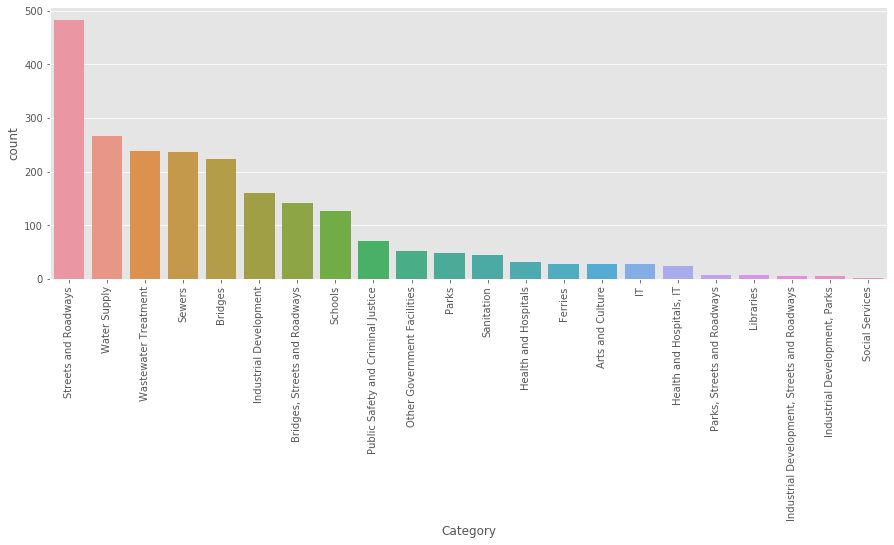

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=data["Category"], data=data, order = data['Category'].value_counts().index)
print(data["Category"].value_counts())

Some of the projects have multiple client agencies. The three biggest agencies are: DEP- the department of environmental protection, the DOT- department of transportation, and the DOE- department of education. 

DEP                    784
DOT                    267
DOE                    127
DCAS                    79
DSNY                    51
H+H                     50
DEP, DOT                45
DPR                     34
DCLA                    27
FDNY                    18
FDNY, NYPD              15
DOT, Mayor's Office     15
DEP, DOT, EDC           15
EDC                     13
NYPD                    11
DOC                     10
DEP, EDC                10
DHS                      8
WWC                      7
Mayor's Office           7
DOHMH, HHC               7
ORR                      6
DSBS                     6
BWT                      6
BWS                      6
BPL                      6
QL                       5
ACS                      3
BTDS                     3
DOHMH                    3
Name: Client Agency, dtype: int64


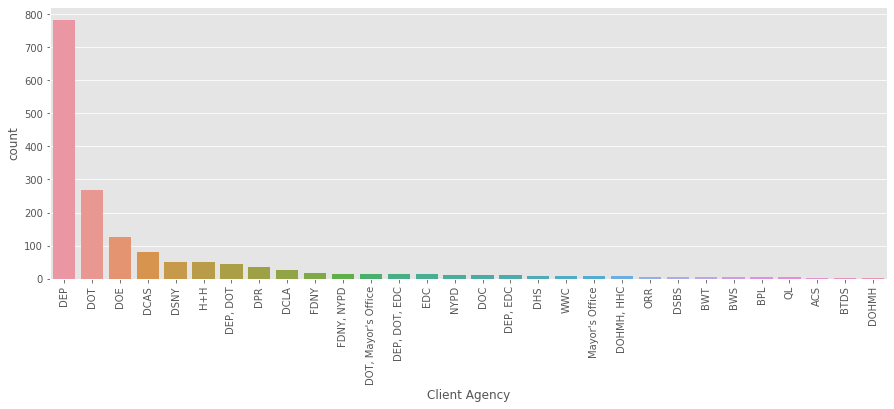

In [17]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=data["Client Agency"], data=data, order = data['Client Agency'].value_counts().index)
print(data["Client Agency"].value_counts())

Most of the projects are taking place in Brooklyn (455); there are approx. 280 projects occuring in both Queens and Manhatten. There are a few "Boroughs" listed that are not in NYC proper, Marlboro is in New Jersey and Carmel and "Upstate" are both upstate. The dataset notes that some sewer projects cross into many municipalities. 

In [18]:
data["Borough"].value_counts()

Brooklyn                           455
Queens                             288
Manhattan                          278
Bronx                              217
Staten Island                      122
Citywide                            94
Upstate                             30
Manhattan, Bronx                    25
New York                            20
Carmel                              15
Bronx, Manhattan                    15
Marlboro                            15
Port Jervis                         12
Valhalla                            12
Manhatten                            9
Brooklyn, Queens                     9
Olive                                8
Manhattan, Staten Island             5
Manhattan, Staten Island, Bronx      5
Name: Borough, dtype: int64

The PID field indicates is a unique identifier for each of the projects. The histogram below indates that there can be multiple project updates for a given project. In total, there are only 378 unique projects in the dataset. An example of a project with multiple updates is PID=3, which has 13 total entries. 

Number of unique projects in dataset 378


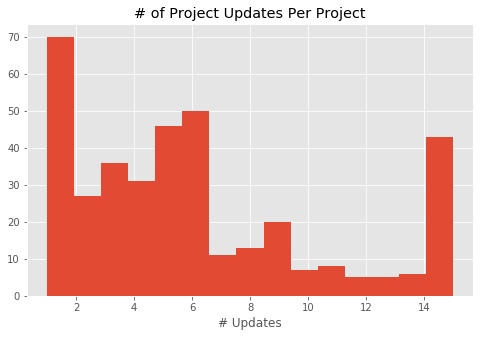

In [19]:
print('Number of unique projects in dataset',len(data.PID.unique()))

plt.figure(figsize=(8,5))
data.groupby(["PID"])['Date Reported As Of'].count().hist(bins=15)
plt.title("# of Project Updates Per Project")
plt.xlabel("# Updates")
plt.show()

In the cell below, we examine one example project: PID=3

In [20]:
temp = data.copy()
temp['Date Reported As Of'] = pd.to_datetime(temp['Date Reported As Of'], infer_datetime_format=True)  
temp['Design Start'] = pd.to_datetime(temp['Design Start'], infer_datetime_format=True)

temp[temp.PID==3].sort_values('Date Reported As Of')

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0
5,2016-11-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.696747e+08,398313.0,-4318643.37,09/17/2020,157.0,270.0
6,2017-04-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.741774e+08,4502710.0,-4318643.37,11/30/2020,74.0,270.0
7,2017-09-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.751284e+08,950994.0,-4318643.37,04/28/2020,-216.0,270.0
8,2018-03-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.751594e+08,31015.0,-4318643.37,04/01/2020,-27.0,270.0
9,2018-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.770740e+08,1914587.0,-4318643.37,07/28/2020,118.0,270.0


For a given project, the sum of "Latest Schedule Changes" will equal the "Total Schedule Changes" and the sum of "Latest Budget Changes" will equal the "Total Budget Changes." 

In [21]:
print('Sum of Latest Schedule Changes',temp[temp.PID==3]['Latest Schedule Changes'].sum())
print('Total Schedule Changes Column',temp[temp.PID==3]['Total Schedule Changes'].values[0])

Sum of Latest Schedule Changes 270.0
Total Schedule Changes Column 270.0


In [22]:
print('Sum of Latest Budget Changes',temp[temp.PID==3]['Latest Budget Changes'].sum())
print('Total Budget Changes Column',temp[temp.PID==3]['Total Budget Changes'].values[0])

Sum of Latest Budget Changes -4318643.0
Total Budget Changes Column -4318643.37


### 2.2. Potential Measures of Project Success
There are several considerations the city may care about in "predicting success". Presumably, the government would like projects completed on time and under budget and thus may be interested in the time behind schedule outcome, as well as amount over budget. In lectures, we also learned that a project completing the entire scope of its initial proposal was important. Unfortunately, in this dataset, we will not be able to gauge whether the scope was met and instead will focus on time behind schedule and amount over budget. 

### 2.2.1. Time Behind Schedule 
The first potential outcome we will explore is the time behind schedule. The variable "Total Schedule Changes" is the number of days behind on a project (where negative numbers represent being ahead of schedule). When we examine these outcome variables, we see very few projects are completed ahead of time, with most finishing from on time to 3 years late. On average, projects finish about two years behind schedule.  

In [23]:
print("Mean Time Behind Schedule: ", np.mean(data["Total Schedule Changes"]))

Mean Time Behind Schedule:  669.7182067703568


/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Days Behind Schedule')

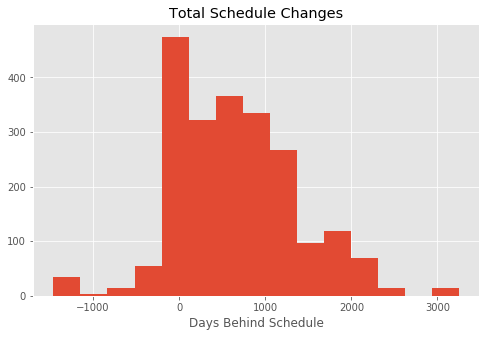

In [24]:
plt.figure(figsize=(8,5))
plt.hist(data["Total Schedule Changes"], bins=15)
plt.title("Total Schedule Changes")
plt.xlabel("Days Behind Schedule")

### 2.2.2. Total Budget Changes
The total budget changes are the number of dollars the project is over or under budget since the design start date. The mean budget change is a staggering 18 million dollars. While these are high dollar projects, the overall mean initial budget for all projects is around 150 million. So, on average, projects are over their budgets by a little over 12\%. It should be noted that this is largely driven by one outlier that was 800 million dollars over budget.  In our follow-up analysis we will change this value to percent over budget to ensure that outliers are not driving the result and to ensure that big budget projects are accurately evaluated. For example, let's say two projects go over their budget by 1 million dollars. The first had an initial budget of 1 million and the second had an initial budget of 40 million. While the city is still out an additional million dollars in either case, the project that spent nearly doubled its estimate would be said to have done a much worse job predicting its cost than the project that went over by 2.5\%. Our measure of percent over budget will show this, rather than using raw levels. 

In [25]:
print("Mean Budget Change: $", round(np.mean(data["Total Budget Changes"]),2))
print("Mean Total Budget: $", round(np.mean(data["Budget Forecast"]),2))
print("Percent of Budget Change: ", round(np.mean(data["Total Budget Changes"])/np.mean(data["Budget Forecast"]),4)*100)
print("Max Budget Change: $", (np.max(data["Total Budget Changes"])))

Mean Budget Change: $ 18387324.12
Mean Total Budget: $ 145650405.46
Percent of Budget Change:  12.620000000000001
Max Budget Change: $ 807802645.0


Text(0.5, 0, 'Budget Changes (in millions)')

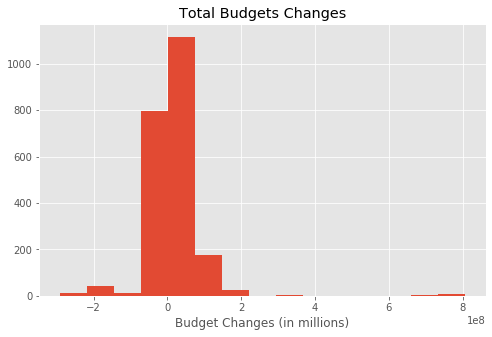

In [26]:
plt.figure(figsize=(8,5))
plt.hist(data["Total Budget Changes"], bins=15)
plt.title("Total Budgets Changes")
plt.xlabel("Budget Changes (in millions)")

### 2.3. Relationship of the predictors

We would like to see some relationships of the variables, if any. To do that, first we would need to fix the data types (change the data type object from data type string to datetime, apply one hot encoding to categorical variables). We do this below. 

In [27]:
df = data.copy()
df['Date Reported As Of'] = pd.to_datetime(df['Date Reported As Of'], infer_datetime_format=True)  
df['Design Start'] = pd.to_datetime(df['Design Start'], infer_datetime_format=True)
display(df.head())
df.info()

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
Date Reported As Of        2259 non-null datetime64[ns]
PID                        2259 non-null int64
Project Name               2259 non-null object
Description                2150 non-null object
Category                   2259 non-null object
Borough                    1634 non-null object
Managing Agency            2259 non-null object
Client Agency              1644 non-null object
Current Phase              2154 non-null object
Design Start               2095 non-null datetime64[ns]
Budget Forecast            2153 non-null float64
Latest Budget Changes      1881 non-null float64
Total Budget Changes       2194 non-null float64
Forecast Completion        2137 non-null object
Latest Schedule Changes    1866 non-null float64
Total Schedule Changes     2186 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 282.5+ KB


In [28]:
dummies = pd.get_dummies(df[['Category','Borough','Managing Agency','Current Phase']], drop_first=True)
df = pd.concat([df.drop(['Category','Borough','Managing Agency','Current Phase'], axis=1), dummies], axis=1)
df

,Date Reported As Of,PID,Project Name,Description,Client Agency,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,...,Managing Agency_DSNY,Managing Agency_EDC,Managing Agency_FDNY,Managing Agency_HHC,Managing Agency_SCA,Current Phase_Construction,Current Phase_Construction Procurement,Current Phase_Design,Current Phase_IT,Current Phase_Scoping/Planning
0,2014-05-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,...,0,0,0,0,0,0,0,1,0,0
1,2015-02-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,...,0,0,0,0,0,0,1,0,0,0
2,2015-08-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,...,0,0,0,0,0,0,1,0,0,0
3,2016-01-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.692764e+08,3743944.0,-4318643.37,04/01/2020,...,0,0,0,0,0,1,0,0,0,0
4,2016-06-01,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,DEP,2013-09-23,1.692764e+08,2.0,-4318643.37,04/13/2020,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2019-09-01,1010,PRIOR NOTICE SIDEWALKS - BROOKLYN,PRIOR NOTICE SIDEWALKS - BROOKLYN,DOT,2015-08-06,2.942700e+07,NaN,NaN,05/13/2020,...,0,0,0,0,0,1,0,0,0,0
2255,2019-09-01,1011,"RECONSTRUCTION OF ROSEDALE AREA, PHASE 2",NaN,DOT,2018-06-07,3.936000e+07,NaN,NaN,08/14/2024,...,0,0,0,0,0,0,0,1,0,0
2256,2019-09-01,1012,"RECONSTRUCTION OF FRONT STREET, MANHATTAN","Reconstruction of Front Street, Manhattan",DOT,2015-07-31,2.735600e+07,NaN,NaN,06/16/2022,...,0,0,0,0,0,0,1,0,0,0
2257,2019-09-01,1013,"GRAND CONCOURSE, PHASE 5",THE FIFTH PHASE OF THE RECONSTRUCTION OF THE G...,DOT,2019-09-16,7.892100e+07,NaN,NaN,09/13/2025,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 67 columns):
Date Reported As Of                                      2259 non-null datetime64[ns]
PID                                                      2259 non-null int64
Project Name                                             2259 non-null object
Description                                              2150 non-null object
Client Agency                                            1644 non-null object
Design Start                                             2095 non-null datetime64[ns]
Budget Forecast                                          2153 non-null float64
Latest Budget Changes                                    1881 non-null float64
Total Budget Changes                                     2194 non-null float64
Forecast Completion                                      2137 non-null object
Latest Schedule Changes                                  1866 non-null float64
Total Schedule C

The plot below shows the heatmap matrix of the correlations. In our plot, darker colors represent weaker correlations and lighter colors represent stronger correlations. Most of our plot is represented by darker colors, which indicates that most of the variables have very low correlations with each other. Most of the highly correlated variables are those that are directly related. For example, the indicator for a health project is highly correlated with the managing agency being HHC, which is the organization that manages health in hospitals in NYC. 

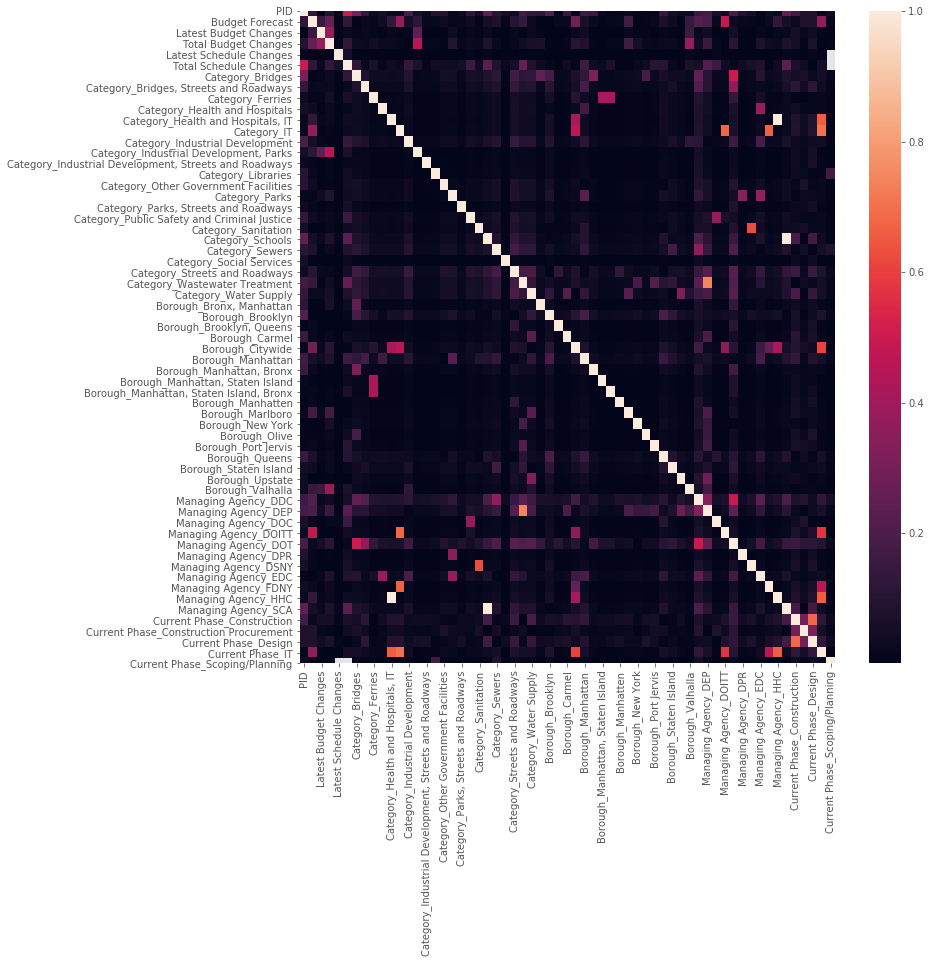

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df.corr()))

In [31]:
data_percent = data.copy()
data_percent['percent_latest_budget_change'] = data_percent['Latest Budget Changes']/data_percent['Budget Forecast']*100
data_percent['percent_total_budget_change'] = data_percent['Total Budget Changes']/data_percent['Budget Forecast']*100

We want to see if the budget changes is dependent on the budget forecast, so we build the scatterplot below. 
It seems like the lower the budget forecast, the higher the range of budget changes (which goes in either direction - positive and negative). Whats interesting is that while the latest budget change seems to be lower (more points in the negative side) while the total budget change seems to be higher (more points in the positive side).

(-300, 300)

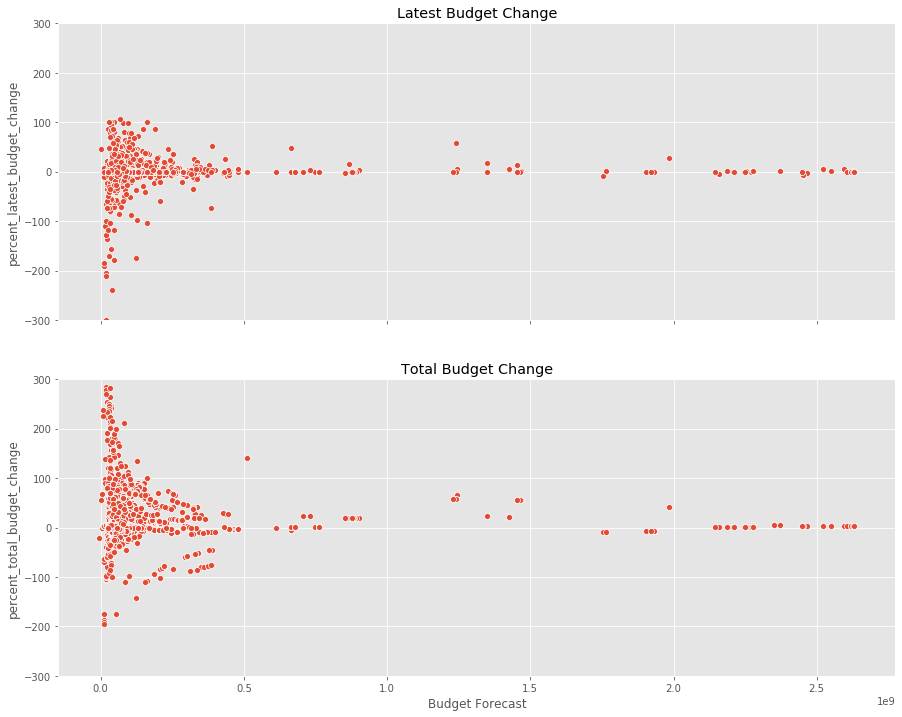

In [32]:
fig, ax =plt.subplots(2,1,figsize=(15,12), sharex=True,sharey=True)
sns.scatterplot(x='Budget Forecast',y ='percent_latest_budget_change',data = data_percent, ax=ax[0])
ax[0].set_title('Latest Budget Change')
sns.scatterplot(x='Budget Forecast',y ='percent_total_budget_change',data = data_percent, ax=ax[1])
ax[1].set_title('Total Budget Change')
plt.ylim([-300,300])

Now, we are going to explore how the latest and total budget changes vary across the phase, managing and client agency, borough, and category of the project.

<Figure size 432x288 with 0 Axes>

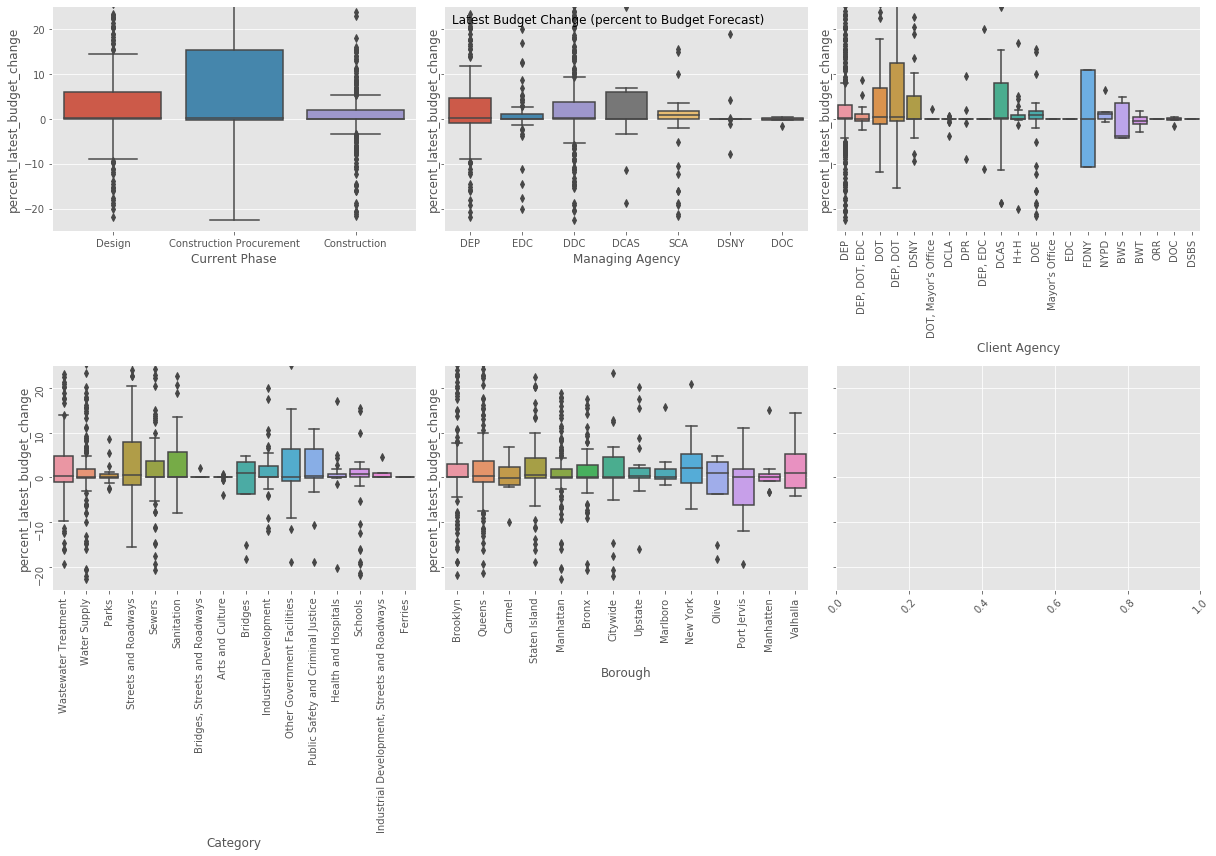

In [33]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='percent_latest_budget_change',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-25,25])
plt.xticks(rotation=45, horizontalalignment='center')
fig.suptitle('Latest Budget Change (percent to Budget Forecast)')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

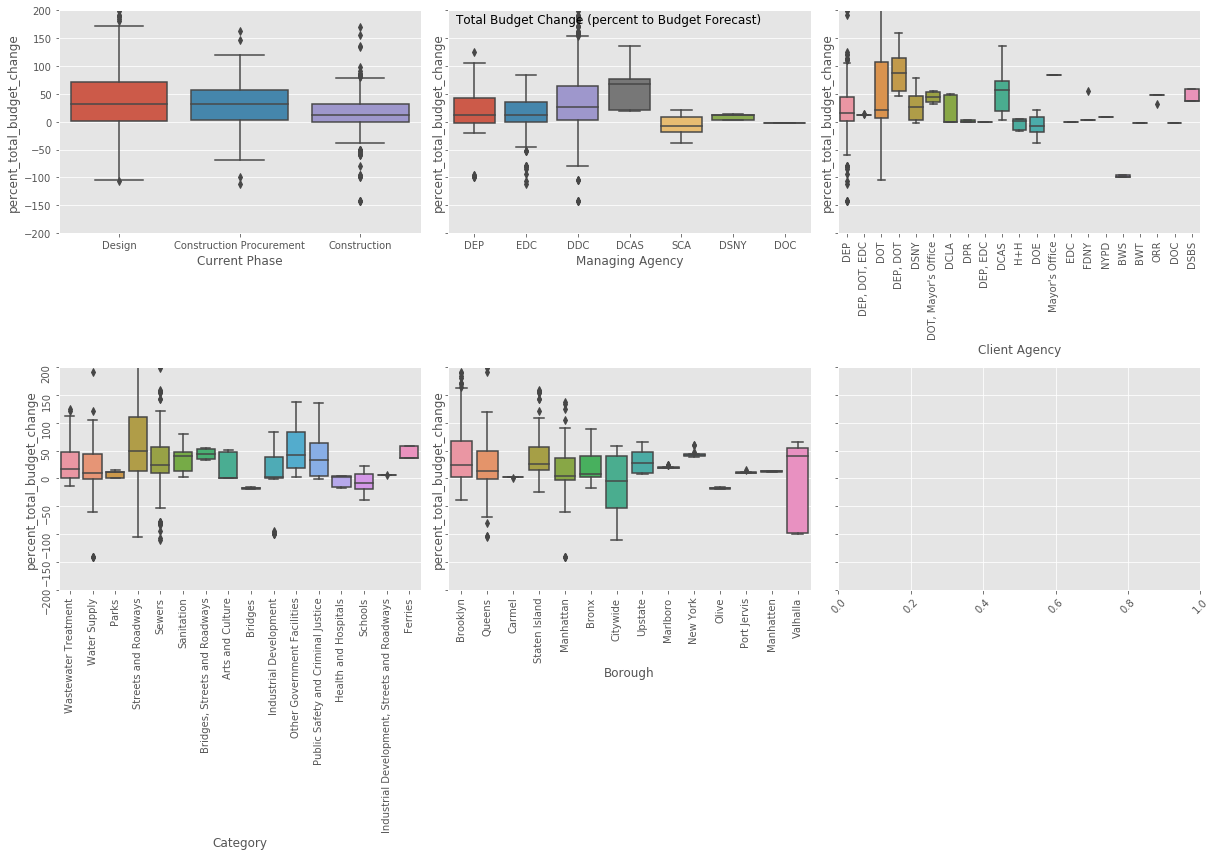

In [34]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='percent_total_budget_change',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-200,200])
plt.xticks(rotation=45, horizontalalignment='center')
fig.suptitle('Total Budget Change (percent to Budget Forecast)')
plt.tight_layout()

The same analysis was to be applied to the schedule changes. The below 2 plots shows how the schedule changes vary across the phase, managing and client agency, borough, and category of the project.

<Figure size 432x288 with 0 Axes>

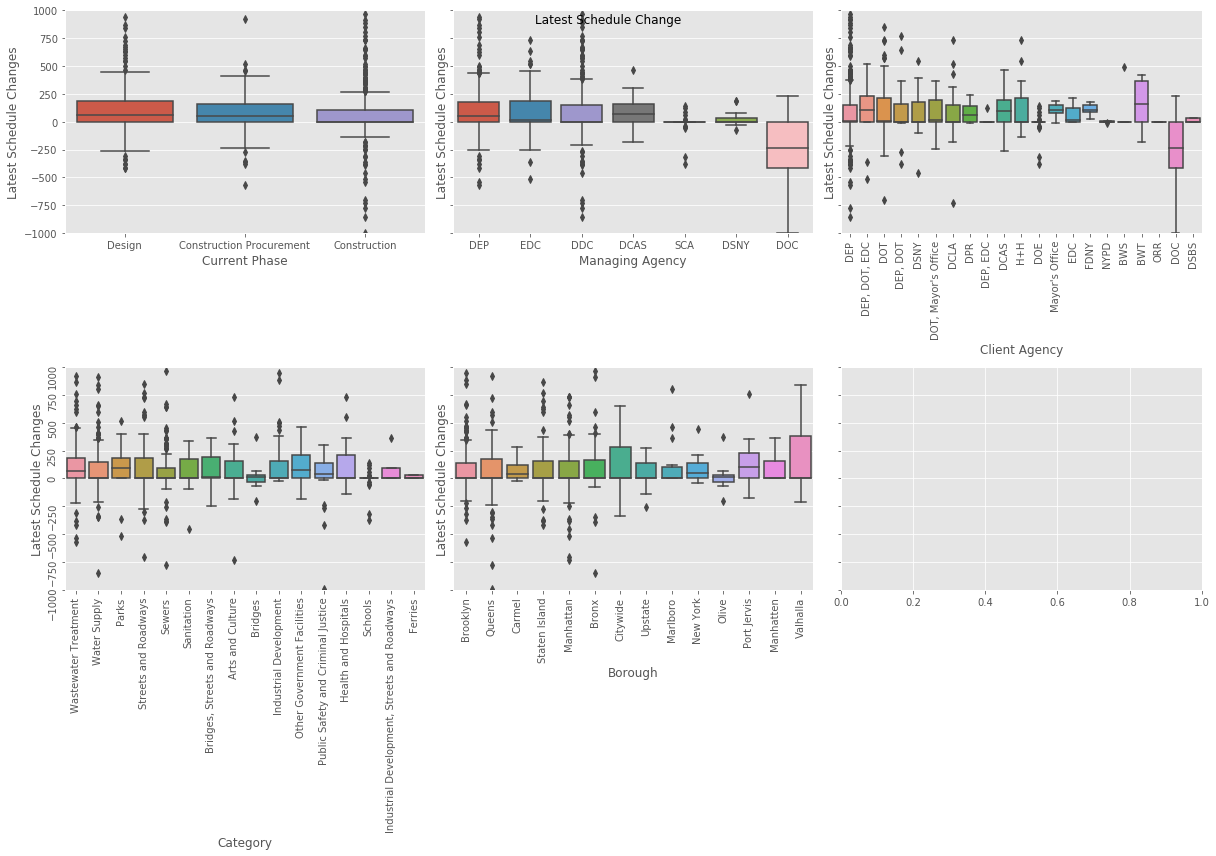

In [35]:
plt.tight_layout()
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='Latest Schedule Changes',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
plt.ylim([-1000,1000])
fig.suptitle('Latest Schedule Change')
plt.tight_layout()

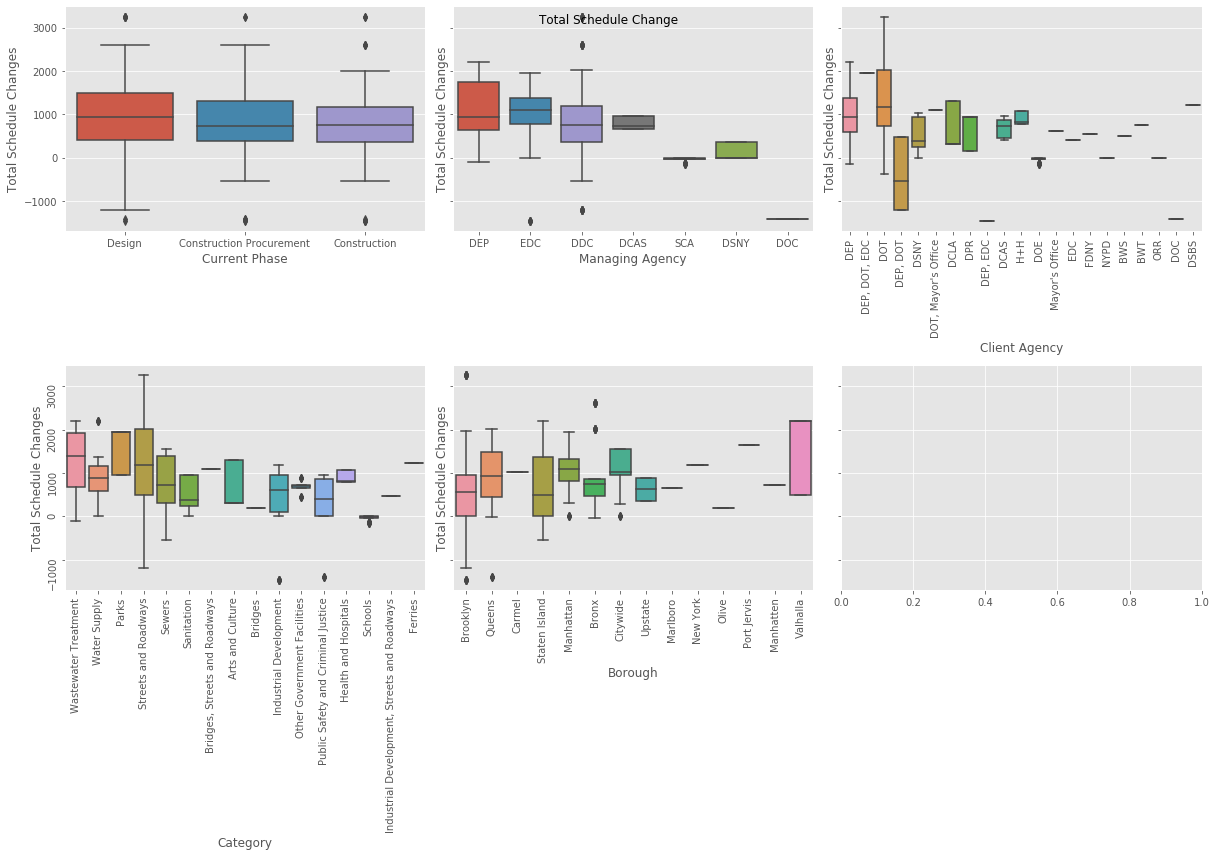

In [36]:
fig, ax = plt.subplots(2,3,figsize=(17,12),sharey=True)
sns.boxplot(x='Current Phase',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,0])
sns.boxplot(x='Managing Agency',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,1])
sns.boxplot(x='Client Agency',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[0,2])
ax[0,2].tick_params(labelrotation=90)
sns.boxplot(x='Category',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[1,0])
ax[1,0].tick_params(labelrotation=90)
sns.boxplot(x='Borough',y ='Total Schedule Changes',data = data_percent.dropna(), ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
# plt.ylim([-1000,1000])
fig.suptitle('Total Schedule Change')
plt.tight_layout()

## 3. Data Preparation and Modeling

Based on the literature, we figured that the outcomes (Target Variables) that reflect the "success" of the project includes *budget* and *schedule* changes. So we built separate models to predict each of these metrics separately.



### 3.1 Total Schedule Changes
### 3.1.1. Data Preparation
We created separate dataset for each prediction (for schedule changes and budget changes). As a first step, we remove all columns that are not used for prediction (such as the PID, date reported as of, etc.). At each model, we also kept one of the target variables only (to predict schedule changes, we drop all the target budget changes column, and vice versa). 

In [5]:
df = data.copy()
df['Design Start']=pd.to_datetime(df['Design Start'])
df['Forecast Completion']=pd.to_datetime(df['Forecast Completion'])
df.drop(['PID'], axis=1, inplace=True)

# create a df for schedule prediction
df_sched = df.copy()

# drop budget related columns
df_sched.drop(['Budget Forecast', 'Latest Budget Changes','Total Budget Changes'], axis=1, inplace=True)

# calculate schedule changes as a percentage
df_sched['Timeline(days)'] = (df_sched['Forecast Completion']-df_sched['Design Start']).dt.days
df_sched['Total_Schedule_Changes_percent']=df_sched['Total Schedule Changes']/df_sched['Timeline(days)']

# drop unsued columns, left only the total schedule changes (as percentage) for the target variable
df_sched.drop(['Date Reported As Of', 'Design Start','Forecast Completion','Latest Schedule Changes', 'Total Schedule Changes', 'Timeline(days)'], axis=1, inplace=True)
display(df_sched.info())
display(df_sched.head())

# drop the rows that have null values for the schedule changes
df_sched = df_sched.dropna(subset=['Total_Schedule_Changes_percent'])
df_sched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 8 columns):
Project Name                      2259 non-null object
Description                       2150 non-null object
Category                          2259 non-null object
Borough                           1634 non-null object
Managing Agency                   2259 non-null object
Client Agency                     1644 non-null object
Current Phase                     2154 non-null object
Total_Schedule_Changes_percent    2037 non-null float64
dtypes: float64(1), object(7)
memory usage: 141.3+ KB


None

,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Total_Schedule_Changes_percent
0,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,0.117188
1,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,0.108390
2,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,0.107527
3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,0.113350
4,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,0.112782


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2203
Data columns (total 8 columns):
Project Name                      2037 non-null object
Description                       2037 non-null object
Category                          2037 non-null object
Borough                           1525 non-null object
Managing Agency                   2037 non-null object
Client Agency                     1522 non-null object
Current Phase                     2037 non-null object
Total_Schedule_Changes_percent    2037 non-null float64
dtypes: float64(1), object(7)
memory usage: 143.2+ KB



### 3.1.2. Modelling Description


For each prediction metrics, we developed a simple baseline model and 3 alternative approaches to determine the effectiveness of the different approaches:
- Approach A: Baseline, linear model using Category and Borough categorical features
- Approach B: Using TfidfVectorizer to vectorized the texts
- Approach C: Using Latent Dirichlet Allocation (LDA) to cluster the projects into "topics"
- Approach D: Using neural network that concatenates categorical features and embedding layer from text features  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_sched.drop('Total_Schedule_Changes_percent', axis=1), 
                                                    df_sched['Total_Schedule_Changes_percent'], test_size=0.2)

In [4]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import re #regex
from sklearn.model_selection import GridSearchCV

### 3.1.3. Approach A -  Baseline model

Professor Grushka-Cockayne's presentation suggested that there were differences in performances between project categories and project boroughs. For comparison purposes, we produce a baseline model that includes project categories and boroughs as features in a linear model. The linear model is baseline model because it has the least complexity.
The categorical data is one-hot encoded after imputing missing values with a new category ('missing').

In [77]:
# create linear regression features
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#features=FeatureUnion([('Category', categorical_transformer),
#                       ('Borough', categorical_transformer),
#                      ])
features = ColumnTransformer(transformers=[
        ('Category', categorical_transformer, ['Category']),
        ('Borough', categorical_transformer, ['Borough'])])

# create pipeline
linreg  = Pipeline(steps=[('feature', features), 
                      ('reg', LinearRegression(fit_intercept=False))
                     ])
# fit linear model
linreg.fit(X_train, y_train)

# create predictions and compute scores
pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)
print("train:",r2_score(y_train, pred_train))
print("test:",r2_score(y_test, pred_test))
print()
print("train mse:",mean_squared_error(y_train, pred_train))
print("test mse:",mean_squared_error(y_test, pred_test))

train: 0.2151994554228588
test: 0.18690083237537625

train mse: 0.07524822470064413
test mse: 0.06350748009432422


To understand the important features in the baseline linear regression, we can look at the magnitude of the coefficients for each of the features. The large positive coefficients indicate features that predict larger schedule delays than the average project and large negative coefficients indicate features that predict smaller schedule delays than the average project. 

For the Category features:
* Positive features: Wastewater Treatment, Streets and Roadways, and Water Supply, etc
* Negative features: Schools and Industrial Development, Parks

For the Borough features:
* Positive features: Citywide, Port Jarvis, Valhalla, Manhattan, Brooklyn, etc
* Negative features: combined project between Manhattan, Staten Island, and the Bronx

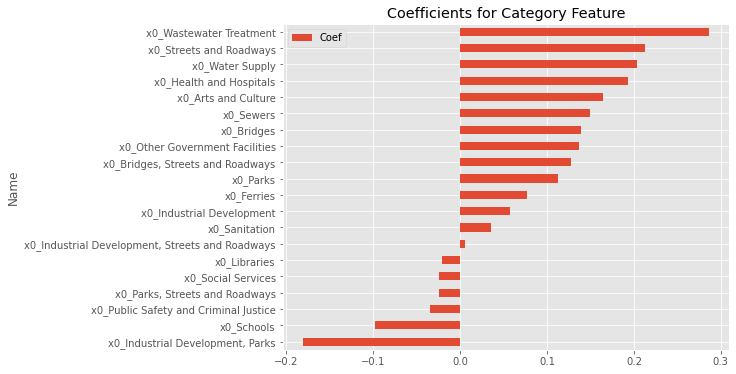

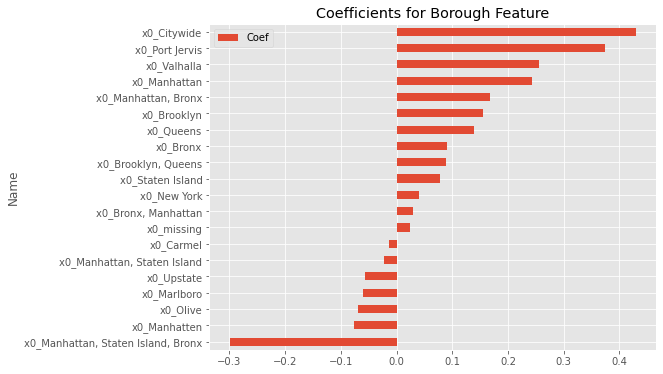

In [69]:
# look at linear coefficients for visualization
category_names = list(features.named_transformers_['Category'].named_steps['onehot'].get_feature_names())
borough_names = list(features.named_transformers_['Borough'].named_steps['onehot'].get_feature_names())
feature_names = category_names+borough_names
feature_values = pd.DataFrame({'Coef':linreg.named_steps['reg'].coef_,'Name':feature_names})

# plot for Category
feature_values[feature_values.Name.isin(category_names)].sort_values('Coef').set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('Coefficients for Category Feature')
plt.show()

# plot for Borough
feature_values[feature_values.Name.isin(borough_names)].sort_values('Coef').set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('Coefficients for Borough Feature')
plt.show()

### 3.1.4. Approach B -  Using text vectorization TfidfVectorizer 

#### Data Preprocessing

The idea is to create a pipeline, which includes the steps to transform each feature. 

- The **categorical data** is one-hot encoded after imputing missing values with a new category ('missing').

- The **text data** is vectorized, basically classifying the texts based on the words frequency. 
    - The standard way to do this is use Count Vectorizer, which counts the number of occurrences of each word. But in this case, we're going to use `TfidfVectorizer`. Tf-Idf takes into account the frequency of a word in a document, weighted by how frequently it appears in the entire corpus. Common words like “the” or “that” will have high term frequencies, but when we weigh them by the inverse of the document frequency, that would be 1 (because they appear in every document), and since TfIdf uses log values, that weight will actually be 0 since log 1 = 0. By comparison, if one document contains the word “bridge”, and it’s the only document on that topic out of a set of 100 documents, then the inverse frequency will be 100, so its Tf-Idf value will be boosted, signifying that the document is *uniquely* related to the topic of “bridge”. 
    
        To summarize, the `TfidfVectorizer` in sklearn will return a matrix with the tf-idf of each word in each document, with higher values for words which are specific to that document, and low (0) values for words that appear throughout the corpus.
        
    - We also use a custom tokenizer, which extracts only number-and-letter-based words and applies a stemmer. What a stemmer does is it reduces inflectional forms and derivationally related forms of a word to a common base form, so it reduces the feature space. For example, the Porter Stemmer we use here would reduce “modifying”, “modified”, “modifies” to just “modify”.

After we are done setting up the transformer pipelines for each feature, we then use `ColumnTransformer` to combine all these transformer pipeline together for the entire dataset (basically assigning the right transformer to each predictor).


In [10]:

# Preprocessing
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
    
    
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])


project_transformer = Pipeline([('colext', TextSelector('Project Name')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

desc_transformer = Pipeline([('colext', TextSelector('Description')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])
if False:
    features=FeatureUnion([('Project Name', project_transformer),
                           ('Description', desc_transformer),
                           ('Category', categorical_transformer),
                           ('Borough', categorical_transformer),
                           ('Managing Agency', categorical_transformer),
                           ('Client Agency', categorical_transformer),
                           ('Current Phase', categorical_transformer),
                          ])
    
features=ColumnTransformer([('Project Name', project_transformer,['Project Name']),
                       ('Description', desc_transformer,['Description']),
                       ('Category', categorical_transformer,['Category']),
                       ('Borough', categorical_transformer,['Borough']),
                       ('Managing Agency', categorical_transformer,['Managing Agency']),
                       ('Client Agency', categorical_transformer,['Client Agency']),
                       ('Current Phase', categorical_transformer,['Current Phase']),
                      ])

#### Building the Regression Model for Prediction

We now append the regressor to preprocessing pipeline so we have a full prediction pipeline.
For the base model, we are going to use trees (we try both XGBoost and random forest) to predict the schedule changes. We can utilize GridSearch to find the best combination of parameters to build the model.

**XGBoost**

In [80]:
reg_xgb_alt = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15],
    'reg__learning_rate':[0.001, 0.01, 0.1],
    'reg__lambda':[0.5, 1, 1.5, 2.0],
    'reg__alpha':[0.5, 1, 1.5, 2.0],
}

search_xgb_alt = GridSearchCV(reg_xgb_alt, param_grid, n_jobs=4, scoring='r2')
search_xgb_alt.fit(X_train, y_train)
print("Best parameter for XGBoost (CV score=%0.3f):" % search_xgb_alt.best_score_)
print(search_xgb_alt.best_params_)

Best parameter for XGBoost (CV score=0.857):
{'reg__alpha': 0.5, 'reg__lambda': 2.0, 'reg__learning_rate': 0.1, 'reg__max_depth': 15, 'reg__n_estimators': 200}


In [81]:
# build the model
reg_xgb_alt = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 15, n_estimators=200, reg_alpha= 0.5, reg_lambda= 2.0, learning_rate= 0.1))
                     ])

reg_xgb_alt.fit(X_train, y_train)
pred_train_xgb = reg_xgb_alt.predict(X_train)
pred_test_xgb = reg_xgb_alt.predict(X_test)
print("train:",r2_score(y_train, pred_train_xgb))
print("test:",r2_score(y_test, pred_test_xgb))
print()
print("train mse:",mean_squared_error(y_train, pred_train_xgb))
print("test mse:",mean_squared_error(y_test, pred_test_xgb))

train: 0.9362057950825717
test: 0.8645352620730857

train mse: 0.006116714239555079
test mse: 0.010580534933406842


**random forest**

In [107]:
reg_rf = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15, 20],
}

search_rf = GridSearchCV(reg_rf, param_grid, n_jobs=4, scoring='r2')
search_rf.fit(X_train, y_train)
print("Best parameter for RandomForest (CV score=%0.3f):" % search_rf.best_score_)
print(search_rf.best_params_)

Best parameter for RandomForest (CV score=0.828):
{'reg__max_depth': 20, 'reg__n_estimators': 200}


In [113]:
# build the model
reg_rf = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor(max_depth= 20, n_estimators=200))
                     ])

reg_rf.fit(X_train, y_train)
pred_train_rf = reg.predict(X_train)
pred_test_rf = reg.predict(X_test)
print("train:",r2_score(y_train, pred_train_rf))
print("test:",r2_score(y_test, pred_test_rf))

print("train mse:",mean_squared_error(y_train, pred_train_rf))
print("test mse:",mean_squared_error(y_test, pred_test_rf))

train: 0.9123253422443687
test: 0.8578189471004405
train mse: 0.008251266666020336
test mse: 0.012173872349651614


#### Model Evaluation for TfidfVectorizer to Predict Schedule Changes

Best xgboost model using these parameter (highest R2 score from CV): max_depth= 15, n_estimators=200, reg_alpha= 0.5, reg_lambda= 2.0, learning_rate= 0.1

Best Scores:
- $R^2$ from training set = 0.94
- $R^2$ from testing set = 0.86
- mse from training set = 0.0061
- mse from testing set = 0.0106

As we did in the baseline model case, we can look at the feature importances of the XGBoost model. The XGBoost package produces this for us. Looking at the feature importances, the most important features are a mixture of text and categorical features. The top categorical features seem to align well with what we found in the baseline regression: Manhattan, Citywide, Wastewater Treatment, etc.

In [113]:
# get the feature names and feature importances
feature_keys = ['Project Name', 'Description', 'Category', 'Borough', 'Managing Agency', 'Client Agency', 'Current Phase']
feature_names = []
feature_category = []
for k in feature_keys:
    if k in ['Project Name','Description']:
        names = list(features.named_transformers_[k].named_steps['tfidf'].get_feature_names())
    else: 
        names = list(features.named_transformers_[k].named_steps['onehot'].get_feature_names())
    feature_names = feature_names + names
    feature_category = feature_category + [k]*len(names)

xgb_feature_imp = pd.DataFrame({'Category':feature_category,'Name':feature_names,'Importance':reg_xgb_alt.named_steps['reg'].feature_importances_})
xgb_feature_imp.head()


,Category,Name,Importance
0,Project Name,-,0.000568
1,Project Name,1,0.000088
2,Project Name,10,0.000013
3,Project Name,11,0.000067
4,Project Name,115th,0.003804


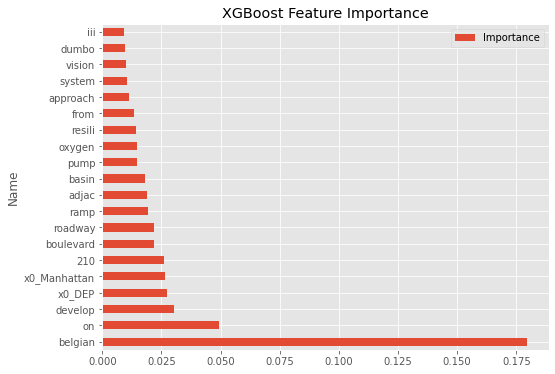

In [116]:
# plot feature importance of all features
xgb_feature_imp.sort_values('Importance',ascending=False).head(20).set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('XGBoost Feature Importance')
plt.show()

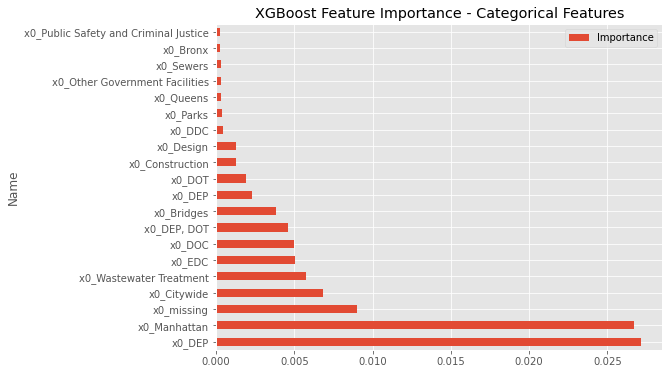

In [117]:
# plot feature importance - categorical features
xgb_feature_imp[~xgb_feature_imp.Category.isin(['Project Name','Description'])].sort_values('Importance',ascending=False).head(20).set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('XGBoost Feature Importance - Categorical Features')
plt.show()

### 3.1.5. Approach C: Using LDA to classify the projects into "topics"


In Natural Language Processing (NLP) lingo, the collection of description text (excerpt on the left) is known as a corpus. This is converted into a Document-Term-Matrix, where each listing is a document containing a matrix of terms. The NLTK and gensim packages were used to complete this.

To reduce the number of terms and focus on the most important per document, non-english and stop words are removed. Words are also lemmatised and a RegEx tokeniser is used to ignore non-alphanumeric strings. The remaining words are then converted into a bag-of-words representation (a list of word_id, word_frequency 2-tuples) for the Document-Term-Matrix. With this in place, we can use **Latent Dirichlet Allocation (LDA)** to discover topics inherent in the corpus, classify the corpus according to the learned topics and use them as features for the regression model.

- LDA is a generative Bayesian inference model that associates each document with a probability distribution over topics, where topics are probability distributions over words. It is an efficient way to analyse large volumes of text and is a more human interpretable method of topic modelling.

Our first thought is to cluster the project (based on the *project name*) into 7 topics as it allowed for very distinct topics with no overlaps, making it a sensible choice to classify each listing. This is based on the "Category" listed in report *Procedures for Dealing with Optimism Bias in Transport Planning*, which was provided in the google drive for the project in https://drive.google.com/drive/folders/1fMBTMeaBk5yHuG3295oatM6ed1_SfIk3.

However, after investigating the classification space created by this LDA model, it seems like the LDA does not separate the texts based on the category that we expected. Hence, we try to find other ways to decide the number of topics for the classification. For this purpose, we look at Coherence Score to determine what number of topics best represent the data. It should be noted that there are not clear "optimal" values for number of clusters, as many of the cohesion values are very similar and thus small changes in sample size or randomization can lead to varying numbers of "optimal" clusters. This is not surprising, as we will show in our pyLDAvis graph, the clusters are not well seperated. This suggests that clustering analysis may not be the most appropriate approach for this setting. However, we will still show our results using these approaches. 

Similarly, we cluster the project (based on the project *description*) using similar approach. While there are still some overalapping circles in the PyLDAvis models, it is not nearly as severe (or worrisome) as the project category. 

In [8]:
# run this in command line to download nltk data
# sudo python -m nltk.downloader -d /usr/local/share/nltk_data all
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import itertools
from collections import Counter
from collections import defaultdict

from pprint import pprint

import json
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()

PYTHONHASHSEED=0
random_state=100

def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus

def nlp_model_pipeline(processed_corpus):
    """Takes processed corpus and produce dictionary, doc_term_matrix and LDA model"""
    # Creates the term dictionary (every unique term in corpus is assigned an index)
    dictionary = Dictionary(processed_corpus)
    # Convert corpus into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(listing) for listing in processed_corpus]    
    return dictionary, doc_term_matrix


def LDA_topic_modelling(doc_term_matrix, dictionary, num_topics=3, passes=2):
    # Create an object for LDA model and train it on Document-Term-Matrix
    LDA = LdaModel
    ldamodel = LDA(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel

def add_topics_to_df(ldamodel, doc_term_matrix, df, new_col, num_topics):
    # Convert into Per-document topic probability matrix:
    docTopicProbMat = ldamodel[doc_term_matrix]
    docTopicProbDf = pd.DataFrame(index=df.index, columns=range(0, num_topics))
    for i, doc in enumerate(docTopicProbMat):
        for topic in doc:
            docTopicProbDf.iloc[i, topic[0]] = topic[1]
            
    docTopicProbDf = docTopicProbDf.apply(pd.to_numeric, errors = 'coerce') # change the type of object
    
    docTopicProbDf[new_col] = docTopicProbDf.idxmax(axis=1)
    df_topics = docTopicProbDf[new_col]
    # Merge with df
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new


In [243]:
# for windows
# import nltk
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package words to
[nltk_data]     /Users/brendanoleary/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brendanoleary/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
# to determine the number of topics to use for classification
def compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, limit=10, start=2, step=2):
    """
    Built LDA model and compute c_v coherence for various number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []    
    for n_topics in range(start, limit, step):

        ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=n_topics)

        model_list.append(ldamodel_description)
        coherencemodel = CoherenceModel(model=ldamodel_description, texts=processed_corpus_description, dictionary=ldamodel_description.id2word,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values



In [9]:
df_sched2 = df_sched.copy()

# Seperate NLP features
corpus = df_sched2['Project Name']
df_sched2 = df_sched2.drop(['Project Name'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)


Num Topics = 5  has Coherence Value of 0.4985
Num Topics = 10  has Coherence Value of 0.4915
Num Topics = 15  has Coherence Value of 0.4963
Num Topics = 20  has Coherence Value of 0.5
Num Topics = 25  has Coherence Value of 0.4967
Num Topics = 30  has Coherence Value of 0.5131
Num Topics = 35  has Coherence Value of 0.5063


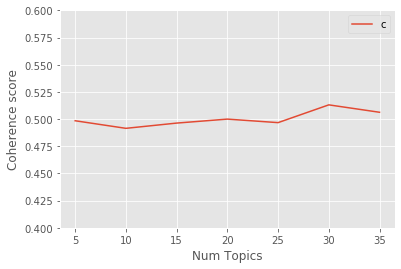

In [11]:
start, limit, step=5,40,5
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.ylim([0.4, 0.6])
plt.show()

Num Topics = 25  has Coherence Value of 0.5055
Num Topics = 26  has Coherence Value of 0.5136
Num Topics = 27  has Coherence Value of 0.504
Num Topics = 28  has Coherence Value of 0.5141
Num Topics = 29  has Coherence Value of 0.4971
Num Topics = 30  has Coherence Value of 0.4998
Num Topics = 31  has Coherence Value of 0.4997
Num Topics = 32  has Coherence Value of 0.5185
Num Topics = 33  has Coherence Value of 0.4937
Num Topics = 34  has Coherence Value of 0.507


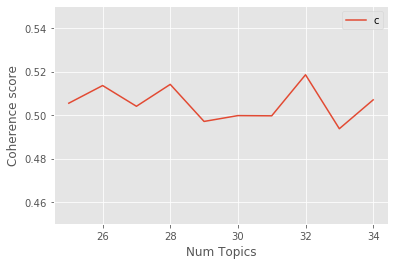

In [12]:
# Repeat the process using the most promising interval : 25-35
start, limit, step=25,35,1
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.ylim([0.45, 0.55])
plt.show()

Based on the graphs above, using **32 number of topics** gives the highest coherence score

In [13]:
# Select the optimal model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_topics=optimal_model.num_topics, num_words=10))

# build the df that incorporates the topic classification
df_sched2 = add_topics_to_df(optimal_model, doc_term_matrix_description, df_sched2, 
                            new_col='topics_projectname', num_topics=optimal_model.num_topics)
df_sched2 = pd.get_dummies(df_sched2, columns=['topics_projectname'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_sched2.shape))

[(0,
  '0.211*"island" + 0.188*"ave" + 0.184*"distribution" + 0.178*"4th" + '
  '0.176*"power" + 0.004*"phase" + 0.002*"area" + 0.002*"new" + 0.001*"3a" + '
  '0.001*"main"'),
 (1,
  '0.051*"east" + 0.049*"street" + 0.042*"avenue" + 0.042*"reconstruction" + '
  '0.041*"construction" + 0.040*"trunk" + 0.038*"2nd" + 0.035*"parkway" + '
  '0.028*"west" + 0.028*"henry"'),
 (2,
  '0.087*"water" + 0.082*"main" + 0.076*"trunk" + 0.070*"st" + 0.065*"avenue" '
  '+ 0.050*"sewer" + 0.041*"210" + 0.039*"creek" + 0.039*"repair" + '
  '0.039*"relief"'),
 (3,
  '0.309*"phase" + 0.166*"reconstruction" + 0.161*"2" + 0.145*"boulevard" + '
  '0.129*"library" + 0.027*"1" + 0.005*"parkway" + 0.003*"dam" + 0.002*"level" '
  '+ 0.002*"high"'),
 (4,
  '0.328*"tank" + 0.320*"fuel" + 0.250*"replacement" + 0.021*"library" + '
  '0.006*"new" + 0.005*"ramble" + 0.005*"road" + 0.003*"sump" + 0.002*"major" '
  '+ 0.002*"sewer"'),
 (5,
  '0.223*"street" + 0.210*"avenue" + 0.189*"north" + 0.182*"33rd" + '
  '0.026*"r

Before using the topics in our regression task, it is important to visualize each of the topics to check whether the topic-word distributions make logical sense. There are two ways we visualize the topic distributions, wordclouds and using the pyLDAvis package. The wordclouds depict the words with the highest probability of being in each topic (p(word|topic)), with the font size proportional to this probability. 

The visualization from the pyLDAvis package is a bit more sophistocated and has several visualizations. We have included a sample for topic 1 below. The left visualization depicts the clustering of each of the thirty-two topics, where the size of the circle is proportional to overall prevalence of the topic in the corpus. The distance between each of the topics is measured by calculating the Jensen-Shannon divergence, a measure of similarity between two probability distributions. Multidimensional scaling is used to project the distances onto two dimensions. We have attachd the LDA.html files that show these graphs by topic number. It is desirable to have little to no overlap of the topic circles. The visualization on the right depicts the most important words of each topic, similarly as the wordcloud visualization. We do not seem to have achieved little circle overlap, however, we do see that for topic 1 at least, there seems to be some intuitive way to link the top 30 most relevant terms. The top 30 most relevant terms seem to be largely be related to bodies of water. We may think water based projects face their own scheduling challenges and thus by grouping them we will better be able to forecast schedule changes and have higher performance.

![title](LDAvis.png)

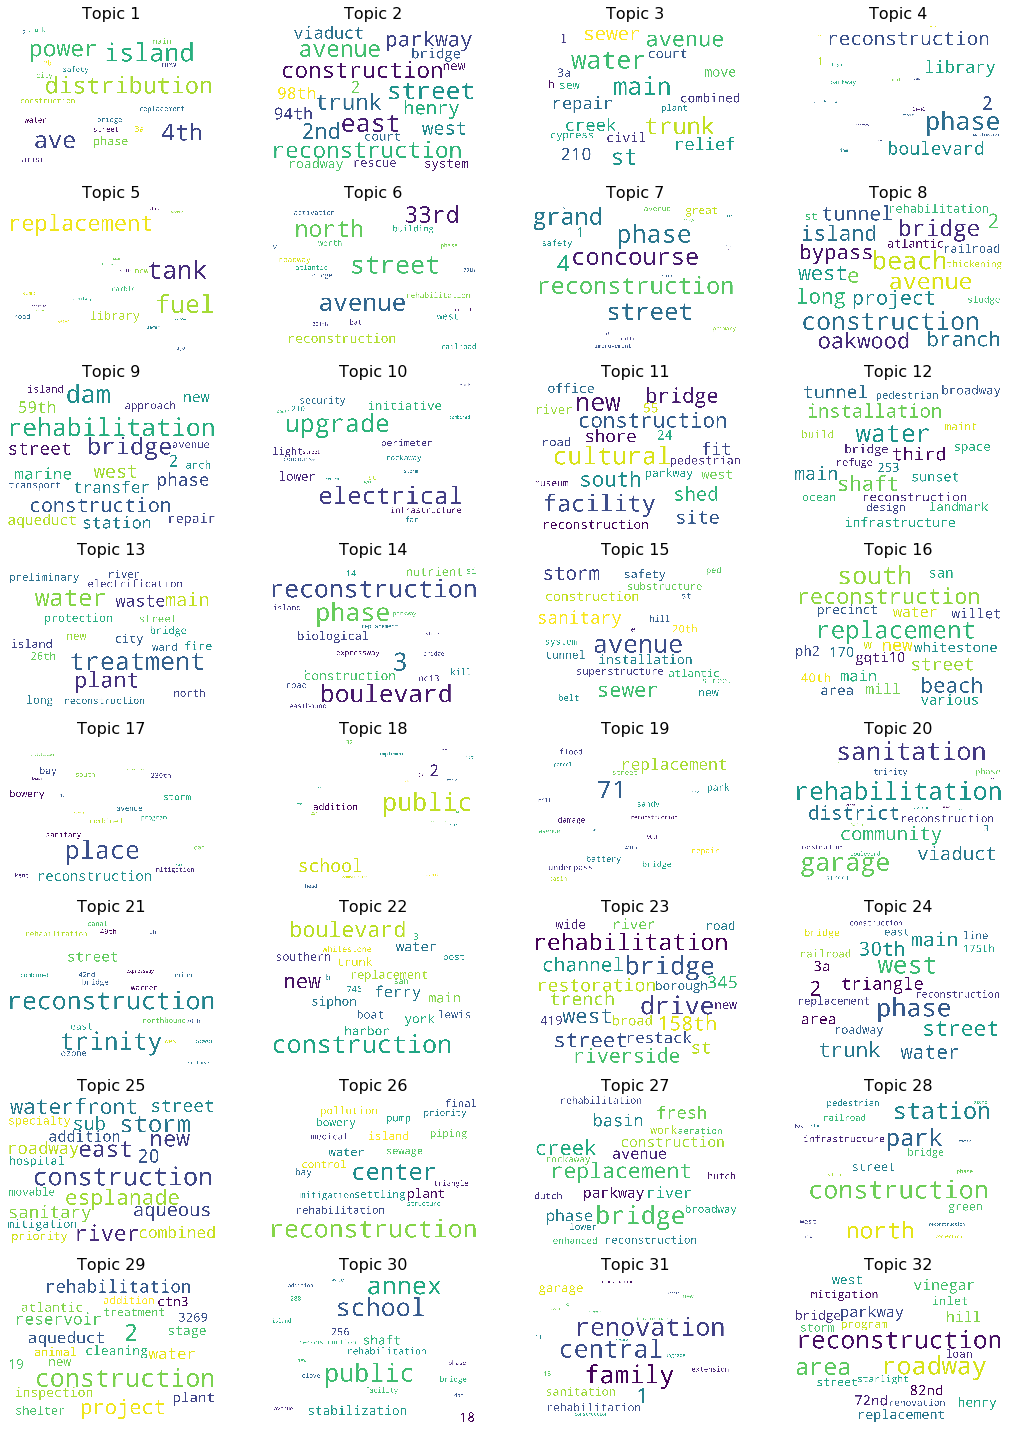

In [14]:
from wordcloud import WordCloud, STOPWORDS

# create wordcloud
cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  #colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# get top 20 words for each topic
topics = optimal_model.show_topics(num_topics = optimal_model.num_topics, num_words=20,formatted=False)

# create for 5x4 topics
fig, axes = plt.subplots(8, 4, figsize=(15,20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [15]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
# inputs: lda model, corpus, dictionary
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix_description, dictionary=optimal_model.id2word)
pyLDAvis.save_html(vis, "schedule_LDA_projectname.html")
pyLDAvis.display(vis)

/anaconda3/envs/cs109b/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


We will now do the same approach for classification for the project description.

Num Topics = 5  has Coherence Value of 0.3058
Num Topics = 10  has Coherence Value of 0.3324
Num Topics = 15  has Coherence Value of 0.3643
Num Topics = 20  has Coherence Value of 0.3498
Num Topics = 25  has Coherence Value of 0.3791
Num Topics = 30  has Coherence Value of 0.3744
Num Topics = 35  has Coherence Value of 0.3529


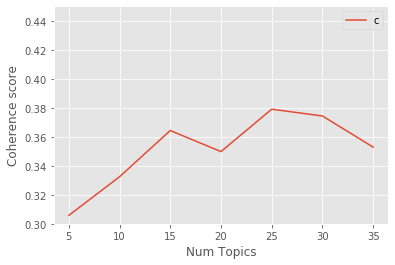

In [79]:
df_sched3 = df_sched2.copy()

corpus = df_sched3['Description']
df_sched3 = df_sched3.drop(['Description'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

start, limit, step = 5,40,5
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.ylim([0.3, 0.45])
plt.show()

Num Topics = 20  has Coherence Value of 0.3594
Num Topics = 21  has Coherence Value of 0.3626
Num Topics = 22  has Coherence Value of 0.3577
Num Topics = 23  has Coherence Value of 0.3771
Num Topics = 24  has Coherence Value of 0.3805
Num Topics = 25  has Coherence Value of 0.3675
Num Topics = 26  has Coherence Value of 0.3797
Num Topics = 27  has Coherence Value of 0.3911
Num Topics = 28  has Coherence Value of 0.3541
Num Topics = 29  has Coherence Value of 0.37


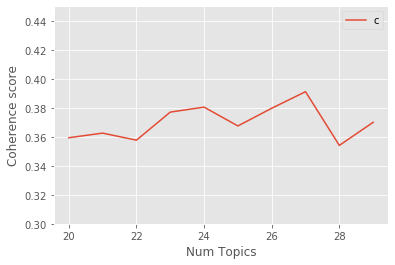

In [80]:
# Repeat the process using the most promising interval : 20-30
start, limit, step=20,30,1
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.ylim([0.3, 0.45])
plt.show()

It seems like **27 number of topics** is the best one for project description. 

In [81]:
# Select the model and print the topics
optimal_model2 = model_list[7]
model_topics = optimal_model2.show_topics(formatted=False)
pprint(optimal_model2.print_topics(num_topics=optimal_model2.num_topics, num_words=10))

df_sched3 = add_topics_to_df(optimal_model2, doc_term_matrix_description, df_sched3, 
                            new_col='topics_description', num_topics=optimal_model2.num_topics)

df_sched3 = pd.get_dummies(df_sched3, columns=['topics_description'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_sched3.shape))


[(0,
  '0.177*"west" + 0.092*"viaduct" + 0.092*"street" + 0.086*"ave" + '
  '0.086*"replacement" + 0.085*"33rd" + 0.082*"office" + 0.082*"11th" + '
  '0.027*"garage" + 0.022*"within"'),
 (1,
  '0.053*"safety" + 0.041*"street" + 0.032*"project" + 0.021*"replacement" + '
  '0.020*"avenue" + 0.016*"roadway" + 0.015*"boat" + 0.014*"drainage" + '
  '0.013*"waterfront" + 0.013*"repair"'),
 (2,
  '0.123*"construction" + 0.091*"000" + 0.064*"upgrade" + 0.059*"building" + '
  '0.059*"municipal" + 0.052*"design" + 0.041*"management" + 0.039*"panel" + '
  '0.039*"wiring" + 0.038*"4"'),
 (3,
  '0.201*"contract" + 0.181*"2018" + 0.059*"department" + 0.056*"york" + '
  '0.049*"design" + 0.042*"new" + 0.042*"city" + 0.025*"storage" + '
  '0.024*"upgrade" + 0.021*"construction"'),
 (4,
  '0.076*"bridge" + 0.058*"new" + 0.032*"concrete" + 0.032*"steel" + '
  '0.031*"span" + 0.028*"replace" + 0.025*"project" + 0.024*"pedestrian" + '
  '0.022*"install" + 0.020*"parkway"'),
 (5,
  '0.234*"street" + 0.119*

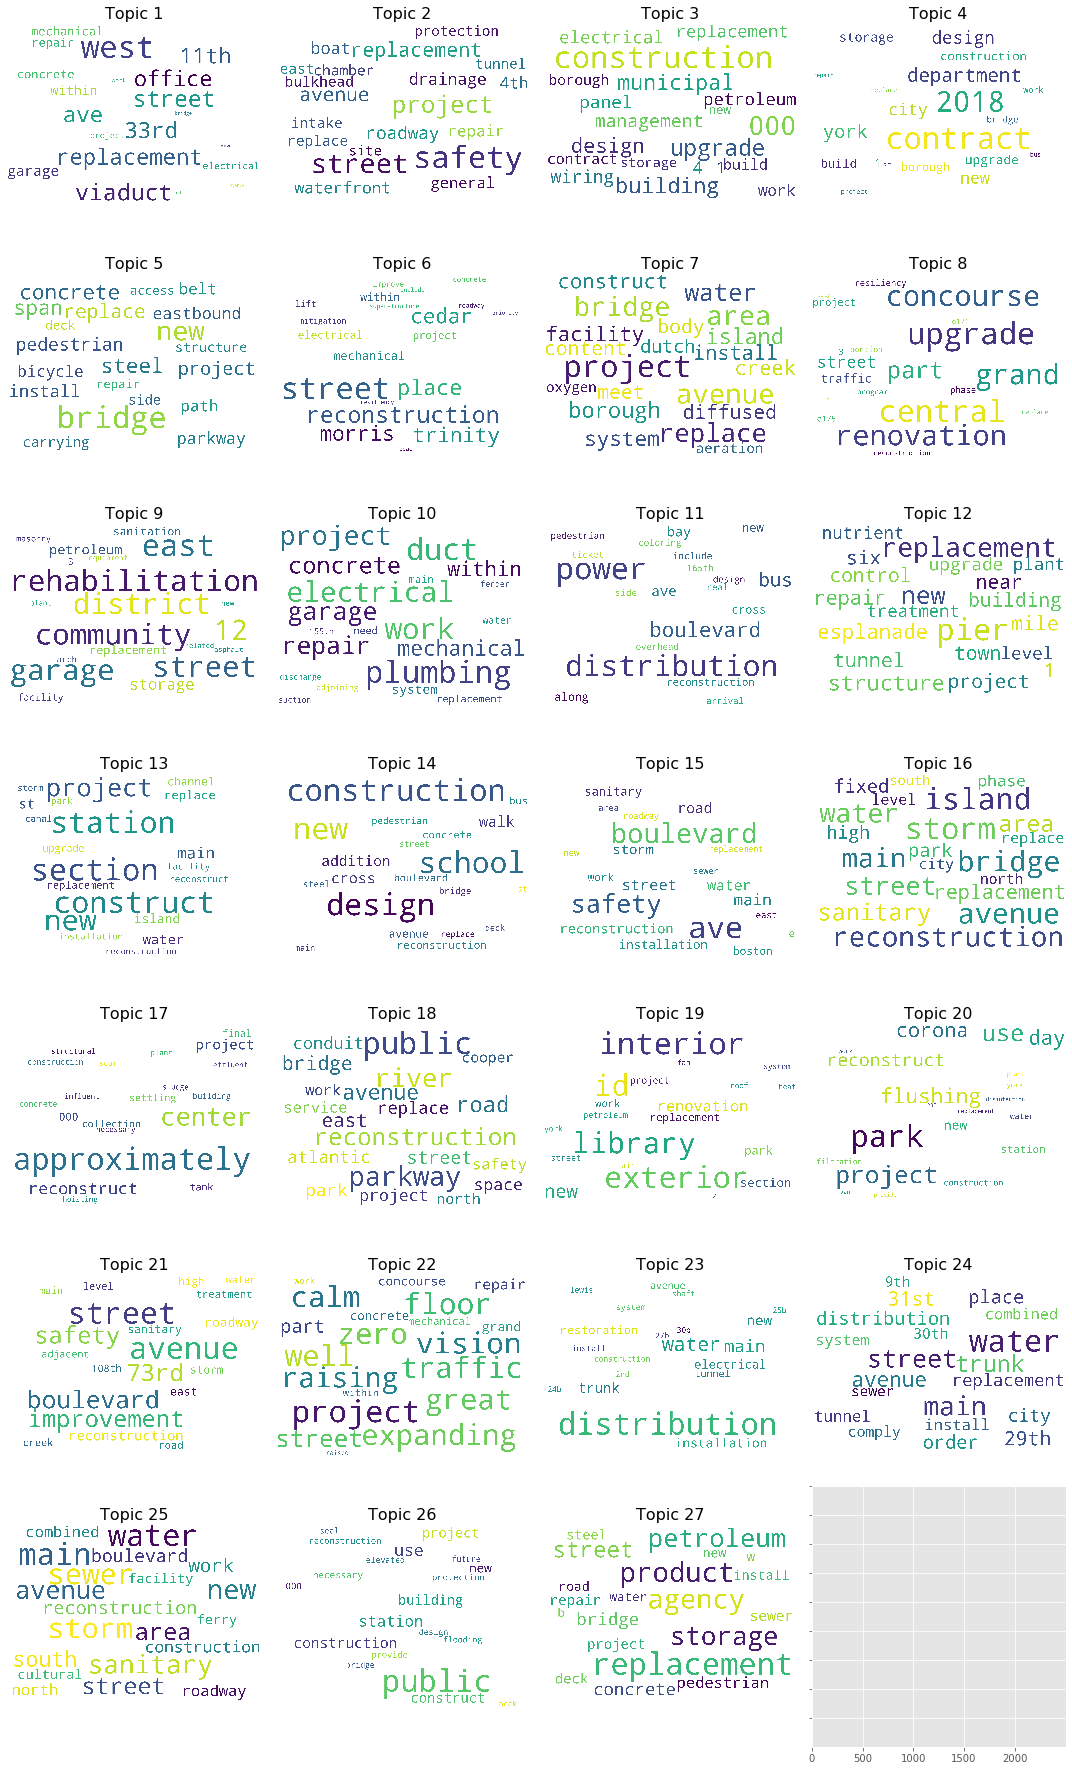

In [82]:
# create wordcloud
cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  #colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# get top 20 words for each topic
topics = optimal_model2.show_topics(num_topics=optimal_model2.num_topics, num_words=20,formatted=False)

# create for each of the topics
fig, axes = plt.subplots(7, 4, figsize=(15,25), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    if i < optimal_model2.num_topics:
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [84]:
pyLDAvis.enable_notebook()
# inputs: lda model, corpus, dictionary
vis2 = pyLDAvis.gensim.prepare(optimal_model2, doc_term_matrix_description, dictionary=optimal_model2.id2word)
pyLDAvis.save_html(vis2, 'schedule_LDA_projectdescription.html')
pyLDAvis.display(vis2)

![title](LDAvis2.png)

As opposed to the project description, we see that the circles in the PyLDAvis for project category are now much more spread than the for project description. This indicates that we have created more distinct clusters. Additionally, we can also see that the word topics for topic 1 are largely congruent and seem to be centered on sewage based systems. The word clouds show similar trends of more similar groupings, such as topic 8 where all the words seem to imply renovations rather than new constructions. We will use these groupings in the following regressions to see if they add predictive power to the model. 

Now, we are ready to go to a supervised regression model to predict the schedule changes.

In [85]:
# Dummy encoding
categorical_feats = ['Category','Borough', 'Managing Agency', 'Client Agency', 'Current Phase']
df_sched3 = pd.get_dummies(df_sched3, columns=categorical_feats, drop_first=False)


# Create response and target variable
X_train, X_test, y_train, y_test = train_test_split(df_sched3.drop('Total_Schedule_Changes_percent', axis=1), 
                                                    df_sched3['Total_Schedule_Changes_percent'], test_size=0.2)

display(X_train)

,topics_projectname_0,topics_projectname_1,topics_projectname_2,topics_projectname_3,topics_projectname_4,topics_projectname_5,topics_projectname_6,topics_projectname_7,topics_projectname_8,topics_projectname_9,...,Client Agency_H+H,Client Agency_Mayor's Office,Client Agency_NYPD,Client Agency_ORR,Client Agency_QL,Client Agency_WWC,Current Phase_Close-Out,Current Phase_Construction,Current Phase_Construction Procurement,Current Phase_Design
1797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2058,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1649,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# trying out with xgboost model
lda_reg_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15],
    'lambda':[0.5, 1, 1.5, 2],
    'alpha':[0.5, 1, 1.5, 2],
}

search_lda_xgb = GridSearchCV(lda_reg_xgb, param_grid, n_jobs=4, scoring='r2')
search_lda_xgb.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_xgb.best_score_)
print(search_lda_xgb.best_params_)

/anaconda3/envs/cs109b/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:03:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameter (CV score=0.817):
{'alpha': 0.5, 'lambda': 0.5, 'max_depth': 15, 'n_estimators': 150}


In [88]:
lda_reg_xgb = XGBRegressor(max_depth=15, n_estimators=150, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5)
lda_reg_xgb.fit(X_train, y_train)
pred_train_xgb = lda_reg_xgb.predict(X_train)
pred_test_xgb = lda_reg_xgb.predict(X_test)
print("train 2^2:",r2_score(y_train, pred_train_xgb))
print("test r^2:",r2_score(y_test, pred_test_xgb))
print("train mse:",mean_squared_error(y_train, pred_train_xgb))
print("test mse:",mean_squared_error(y_test, pred_test_xgb))

/anaconda3/envs/cs109b/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:26:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train 2^2: 0.9067624054270148
test r^2: 0.8367777757441649
train mse: 0.008686968645144599
test mse: 0.014600107786307173


In [33]:
# trying out with random forest model
lda_reg_rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20],
}

search_lda_rf = GridSearchCV(lda_reg_rf, param_grid, n_jobs=2, scoring='r2')
search_lda_rf.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_rf.best_score_)
print(search_lda_rf.best_params_)

Best parameter (CV score=0.783):
{'max_depth': 20, 'n_estimators': 200}


In [34]:
lda_reg_rf = RandomForestRegressor(max_depth=20, n_estimators=200)
lda_reg_rf.fit(X_train, y_train)
pred_train_rf = lda_reg_rf.predict(X_train)
pred_test_rf = lda_reg_rf.predict(X_test)
print("train:",r2_score(y_train, pred_train_rf))
print("test:",r2_score(y_test, pred_test_rf))

train: 0.8683005621579979
test: 0.8192290314528509


#### Model Evaluation for LDA to Predict Schedule Changes


Best xgboost model using these parameter (highest R2 score from CV): max_depth= 15, n_estimatros=150, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5

Best Scores:
- $R^2$ from training set = 0.91
- $R^2$ from testing set = 0.84
- mse from training set = 0.0087
- mse from testing set = 0.0146

In [89]:
#Display feature importance
def feature_importance(model, trainData, display_n_rows):
    """Display feature importance & weighting for tree based model"""
    fi = model.feature_importances_*100
    feat_imp = pd.DataFrame(list(zip(fi,trainData.columns.values)))
    feat_imp = feat_imp.sort_values(by=0, axis=0, ascending=False)
    feat_imp.columns = ['importance %', 'feature']
    print(feat_imp[:display_n_rows])#Display feature importance

#Display features & weighting
feature_importance(lda_reg_xgb, X_train, 20)

     importance %                        feature
31      12.129067          topics_projectname_31
125     10.616735             Client Agency_DSBS
116      8.957000         Client Agency_DEP, EDC
54       4.825408          topics_description_22
42       4.754534          topics_description_10
59       4.700072      Category_Arts and Culture
113      4.040748              Client Agency_DEP
73       3.856518               Category_Schools
114      3.844970         Client Agency_DEP, DOT
76       2.378341  Category_Streets and Roadways
101      2.144108            Managing Agency_DOC
85       2.108318              Borough_Manhattan
105      2.002639            Managing Agency_EDC
138      1.949660           Current Phase_Design
84       1.927204               Borough_Citywide
55       1.548297          topics_description_23
6        1.515271           topics_projectname_6
126      1.218925             Client Agency_DSNY
27       1.116837          topics_projectname_27
23       1.014241   


**Findings:**

From the list of important features above, it seems like `Client Agency` of "DSBS", "DEP, EDC", "DEP", "DEP, DOT", "DSNY", as well as `Managing Agency` of "DOC" and "EDC" plays the most significant role in determining the schedule changes. In addition, `Borough` of Manhattan and Citywide, `Current Phase` in Design, as well as those in `Category` of "Schools", "Streets ans Roadways" and "Arts and Culture" are also important. `Project Name` topic 31, 6, 27, and 23 plays quite a significant role in determining the schedule changes, as well as the `Description` topic 22, 10, and 23. To reiterate from the above visualizations, the top 10 words associated with these topics are:
- project name
    - topic 6: *phase, street, concourse, reconstruction, grand, 4, 1, great, safety, avenue*
    - topic 23: *phase, west, street, trunk, 2, main, water, 20th, triangle, area*
    - topic 27: *construction, park, station, noth, street, green, bridge, infrastructure, railroad, pedestrian*
    - topic 31: *roadway, reconstruction, area, parkway, hill, vinegar, 82nd, 72nd, replacement, henry*
    
- project description 
    - topic 10: *power, distribution, boulevard, bus, ave, bay, new, along, cross, reconstruction*
    - topic 22: *distribution, water, main, new, trunk, installation, electrical, restoration, tunnel, avenue*
    - topic 23: *water, main, street, trunk, avenue, 29th, 31st, order, place, distribution*

### 3.1.6. Approach D: Using neural network with embedding layer


A common NLP technique is to represent words as vectors. This approach became popular with the development of two word embedding models called word2vec and GloVe. The representation of words as vectors has several advantages. First, dense word vectors allow for two words to have similar word vectors if they are semantically or syntactically similar. Second, word embeddings have a lower dimensionality than a sparse, one-hot encoded embedding. 

We construct a neural network that leverages word embeddings as well as the categorical features used in prior models. The model concatenates the word embedding layer output and the input categorical features. The result is then passed through a nonlinear dense layer before the final linear dense layer.

We preprocess the categorical features in a similar way as in prior models, imputing missing values as "missing" and using a one-hot encoder. The "Project Name" and "Description" text fields are combined so that one embedding layer is used in the model. The input text goes through a series of cleaning steps: tokenization, stemming using the Porter Stemmer, special characters are removed, and tokens with numerical characters are removed. 



In [170]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.text import one_hot,text_to_word_sequence

from tensorflow.keras import  Sequential, layers,optimizers
from tensorflow.keras.models import model_from_json,Model
from tensorflow.keras.layers import Input, Embedding, Dense, TimeDistributed, \
                          Dropout, BatchNormalization,Flatten

from sklearn.manifold import TSNE

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendanoleary/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [171]:
# text cleaning
## tokenizer, stemmer, remove special characters, remove stopwords, and remove words with numbers in them
def TokenizerNoNumerical(str_input):
    words = re.sub(r"[^A-Za-z0-9]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = [porter_stemmer.stem(word) for word in words if not any(map(str.isdigit, word)) and word not in stop_words]
    return words

# text preprocessing
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy['Total Text'] = [p+' '+d for p,d in zip(X_train_copy['Project Name'],X_train_copy['Description'])]
X_test_copy['Total Text'] = [p+' '+d for p,d in zip(X_test_copy['Project Name'],X_test_copy['Description'])]
X_train_copy['Total Text'] = X_train_copy['Total Text'].map(TokenizerNoNumerical)
X_test_copy['Total Text'] = X_test_copy['Total Text'].map(TokenizerNoNumerical)

# get corpus word dictionary
words = sorted(set([w for s in X_train_copy['Total Text'] for w in s]+[w for s in X_test_copy['Total Text'] for w in s]))
word2idx = {wd:i for i,wd in enumerate(words)}
idx2word = {i:wd for wd,i in word2idx.items()}
num_words = len(words)

# maximum text length
max_length = max(X_train_copy['Total Text'].map(len).max(),X_test_copy['Total Text'].map(len).max())    

# text features 
## list of lists
X_train_text = [[word2idx[w] for w in s] for s in X_train_copy['Total Text']]
X_test_text = [[word2idx[w] for w in s] for s in X_test_copy['Total Text']]
## padded array
X_train_text = pad_sequences(X_train_text, maxlen=max_length, padding='post',truncating='post')
X_test_text = pad_sequences(X_test_text, maxlen=max_length, padding='post',truncating='post')

# function to create one-hot encode categorical features
def prepare_categorical_features(X_train,X_test):
    X_train = X_train.fillna('missing')
    X_test = X_test.fillna('missing')
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

# create categorical features
cat_features = ['Category','Borough','Managing Agency','Client Agency','Current Phase']
X_train_enc,X_test_enc = prepare_categorical_features(X_train_copy[cat_features],X_test_copy[cat_features])
cat_dim = X_train_enc.shape[1]


In [172]:
# Plot history
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
 
 # model and training parameters 
n_units = 50
dim_embed = 30
batch_size = 32
epochs = 10
validation_split = 0.1
verbose = 1

# create model
text_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=num_words, output_dim=dim_embed, input_length=max_length)(text_input)
embedding_layer = Flatten()(embedding_layer)

cat_input = Input(shape=cat_dim)
x = layers.concatenate([embedding_layer, cat_input])
x = Dense(n_units,activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1)(x)
model = Model([text_input,cat_input],output,name='EmbeddingModel')

# compile model
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mse', metrics=['accuracy'])

# look at model architecture
print(model.summary())

# Train model
history = model.fit([X_train_text,X_train_enc], y_train, shuffle=True,batch_size=batch_size, epochs=epochs, 
                    validation_split=validation_split, verbose=verbose)


Model: "EmbeddingModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 227)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 227, 30)      43590       input_7[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 6810)         0           embedding_3[0][0]                
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 82)]         0                                            
_____________________________________________________________________________________

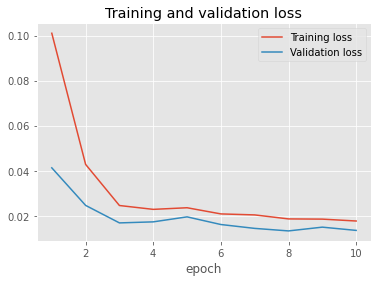

In [173]:
# plot of training/validation loss to check training convergence
plot_training_history(history)

In [174]:
# create prediction on both the training and test set
yhat_train = model.predict([X_train_text,X_train_enc])
yhat_test = model.predict([X_test_text,X_test_enc])

# r^2 and mse
print("train:",r2_score(y_train, yhat_train))
print("test:",r2_score(y_test, yhat_test))

print("train mse:",mean_squared_error(y_train, yhat_train))
print("test mse:",mean_squared_error(y_test, yhat_test))

train: 0.8853859685090922
test: 0.7963549377799769
train mse: 0.010989419483802092
test mse: 0.015905790154757838


To gain some intuition behind the embedding layer, we can look at the vector representation after training. Similar to  PCA, t-distributed stochastic neighbor embedding (TSNE for short) reduces the dimensionality of a matrix, however it does so in a nonlinear way. The dimensionality reduction is done such that similar vectors are reduced to points that are close to each other. The visualization below is a two dimensional TSNE representation of the embedding layer weights. We plot similar words to "develop" and "roadway" (important features from the XGBoost regression model) and the similar words cluster approximately near each other. If these words are closely related, then it is a good sign that our model is actually being able to use the meanings behind the words and use the descriptions/categories to get a more intutitive sense of similar project ypes. Similar words used in this regression task will have similar word vectors and can be found using cosine similarity. For example, below are similar word stems to "develop", such as "archway", "recreat", and "deliv". The similarity of these words will be a bit less intuitive than a pretrained word2vec model (using Wikipedia or another large corpus) because pretrained word embedding models are trained on much larger corpuses and have a larger number of words. Additionally, the embedding layer here is connected to a regression task whereas the word2vec directly identifies words being used in similar contexts. It is possible to use a pretained embedding model to initialize the weights of our embedding layer, but we chose not to for simplicity.

The less intuitive groupings used by the Neural Network, as compared to methods B and C may be one reason why it has lower performance than the other two models. It is not as good at matching "like projects" and thus has a harder time predicting schedule changes. 

In [183]:
from sklearn.metrics.pairwise import cosine_similarity

# embedding weights from model
embedding_weights = model.layers[1].get_weights()[0]

def find_most_similar(word,embedding,topN=10,return_type='words'):
    '''
    function to calculate the top N closest word vectors to a given word
    inputs:
    - word: target word
    - embedding: matrix of embedding weights
    - topN: number of closest words to return
    - return_type: format to return (words,index)
    '''
    word_index = word2idx[word]
    # calculate similarity matrix. return in order from most to least similar
    sim_matrix = cosine_similarity(embedding,embedding[word_index,:].reshape(1,-1)).ravel()
    order = np.argsort(sim_matrix,axis=0)[::-1]
    if return_type == 'words':
        return [(idx2word[idx],sim_matrix[idx]) for idx in order[:topN]]
    else:
        return order[:topN]

# example of close words to develop
find_most_similar('develop',embedding_weights)

[('develop', 1.0000001),
 ('archway', 0.6431341),
 ('four', 0.593537),
 ('recreat', 0.57677543),
 ('state', 0.57161075),
 ('gunhil', 0.5151825),
 ('triangl', 0.4845879),
 ('deliv', 0.477328),
 ('vital', 0.47687665),
 ('gt', 0.4747655)]

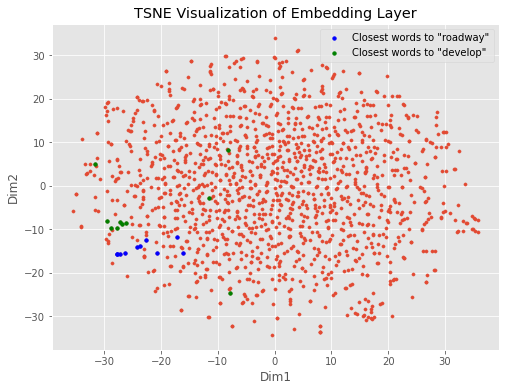

In [196]:
# fit tsne model to visualize embedding
tsne = TSNE(n_components=2,random_state=50)
tsne_latent = tsne.fit_transform(embedding_weights)

# predict
roadway = find_most_similar('roadway',embedding_weights,return_type='index')
develop = find_most_similar('develop',embedding_weights,return_type='index')


plt.figure(figsize=(8,6))
plt.scatter(tsne_latent[:,0],tsne_latent[:,1],s=10)
plt.scatter(tsne_latent[roadway,0],tsne_latent[roadway,1],s=14,c='blue',label='Closest words to "roadway"')
plt.scatter(tsne_latent[develop,0],tsne_latent[develop,1],s=14,c='green',label='Closest words to "develop"')
plt.title('TSNE Visualization of Embedding Layer')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.legend()
plt.show()

## 3.2. Total Budget Changes

### 3.2.1. Data Preparation
We are going to apply similar approach as we did with the total schedule changes prediction. First, we preprocess the dataset to remove any columns related to budget changes, and then we also clean the budget data itself be removing missing values and infinity/-infinity values.


In [57]:
# create a df for schedule prediction
df_budget = df.copy()
# drop budget related columns
df_budget.drop(['Date Reported As Of', 'Design Start','Forecast Completion','Latest Schedule Changes', 'Total Schedule Changes'], axis=1, inplace=True)
# calculate budget changes as a percentage
df_budget['Total_Budget_Changes_percent']=df_budget['Total Budget Changes']/df_budget['Budget Forecast']
#df_budget['Latest_Budget_Changes_percent']=df_budget['Latest Budget Changes']/df_budget['Budget Forecast']
# drop unsued columns, left only the total schedule changes (as percentage) for the target variable
df_budget.drop(['Budget Forecast', 'Latest Budget Changes','Total Budget Changes'], axis=1, inplace=True)

display(df_budget.info())
df_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 8 columns):
Project Name                    2259 non-null object
Description                     2150 non-null object
Category                        2259 non-null object
Borough                         1634 non-null object
Managing Agency                 2259 non-null object
Client Agency                   1644 non-null object
Current Phase                   2154 non-null object
Total_Budget_Changes_percent    2100 non-null float64
dtypes: float64(1), object(7)
memory usage: 141.3+ KB


None

,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Total_Budget_Changes_percent
0,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,-0.023602
1,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,-0.025592
2,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,-0.026089
3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,-0.025512
4,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,-0.025512


In [58]:
# drop missing values
df_budget = df_budget.dropna(subset=['Total_Budget_Changes_percent'])
#df_budget = df_budget.dropna(subset=['Latest_Budget_Changes_percent'])
# drop infinity/-infinity budget changes: there are 8 such cases
df_budget = df_budget[df_budget['Total_Budget_Changes_percent']>float("-inf")]
df_budget = df_budget[df_budget['Total_Budget_Changes_percent']<float("inf")]
#df_budget = df_budget[df_budget['Latest_Budget_Changes_percent']>float("-inf")]
#df_budget = df_budget[df_budget['Latest_Budget_Changes_percent']<float("inf")]

# filter out outliers
low,high = np.percentile(df_budget.Total_Budget_Changes_percent,[2.5,97.5])
df_budget = df_budget[(df_budget['Total_Budget_Changes_percent']>low)&(df_budget['Total_Budget_Changes_percent']<high)]


display(df_budget.info())
df_budget.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2206
Data columns (total 8 columns):
Project Name                    1986 non-null object
Description                     1986 non-null object
Category                        1986 non-null object
Borough                         1485 non-null object
Managing Agency                 1986 non-null object
Client Agency                   1501 non-null object
Current Phase                   1986 non-null object
Total_Budget_Changes_percent    1986 non-null float64
dtypes: float64(1), object(7)
memory usage: 139.6+ KB


None

,Total_Budget_Changes_percent
count,1986.000000
mean,0.200970
std,0.366095
min,-0.794707
25%,0.000000
50%,0.104010
75%,0.389827
max,1.770882


In [59]:
target_variable = 'Total_Budget_Changes_percent'
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_budget.drop(target_variable, axis=1), 
                                                    df_budget[target_variable], test_size=0.2)

(array([ 35.,  47., 293., 893., 342., 224.,  91.,  27.,  16.,  18.]),
 array([-0.79470742, -0.53814848, -0.28158954, -0.02503059,  0.23152835,
         0.48808729,  0.74464623,  1.00120518,  1.25776412,  1.51432306,
         1.770882  ]),
 <a list of 10 Patch objects>)

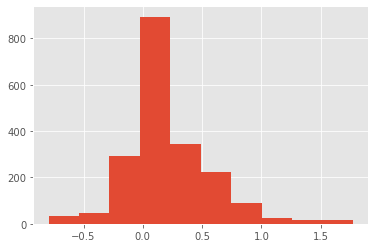

In [237]:
plt.hist(df_budget.Total_Budget_Changes_percent) 

### 3.2.2 Modeling Description

We then implement similar modelling approaches to the dataset:
- Approach A: Baseline, linear model using Category and Borough categorical features
- Approach B: Using TfidfVectorizer to vectorized the texts
- Approach C: Using Latent Dirichlet Allocation (LDA) to cluster the projects into "topics"
- Approach D: Using neural network that concatenates categorical features and embedding layer from text features  

### 3.2.3.  Approach A -  Baseline

In [265]:
# create linear regression features
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

features = ColumnTransformer(transformers=[
        ('Category', categorical_transformer, ['Category']),
        ('Borough', categorical_transformer, ['Borough'])])

# create pipeline
linreg  = Pipeline(steps=[('feature', features), 
                      ('reg', LinearRegression())
                     ])
# fit linear model
linreg.fit(X_train2, y_train2)

# create predictions and compute scores
pred_train = linreg.predict(X_train2)
pred_test = linreg.predict(X_test2)
print("train:",r2_score(y_train2, pred_train))
print("test:",r2_score(y_test2, pred_test))

print("train mse:",mean_squared_error(y_train2, pred_train))
print("test mse:",mean_squared_error(y_test2, pred_test))

train: 0.16624031356197677
test: 0.15328738426876454
train mse: 0.11504569263600256
test mse: 0.09965017657477614


As with the baseline linear regression for predicting schedule changes, we can look at the magnitude of the coefficients for each of the features to understand the feature importance. The large positive coefficients indicate features that predict larger budget increase than the average project and large negative coefficients indicate features that predict smaller budget increases (or larger budget decreases) than the average project. 

For the Category features:
* Positive features: Industrial Development, Parks; Ferries; etc
* Negative features: Schools; Health and Hospitals; Bridges; etc

For the Borough features:
* Positive features: Combined Bronx, Manhattan; Valhalla; Upstate; etc
* Negative features: combined project between Manhattan, Staten Island, and the Bronx



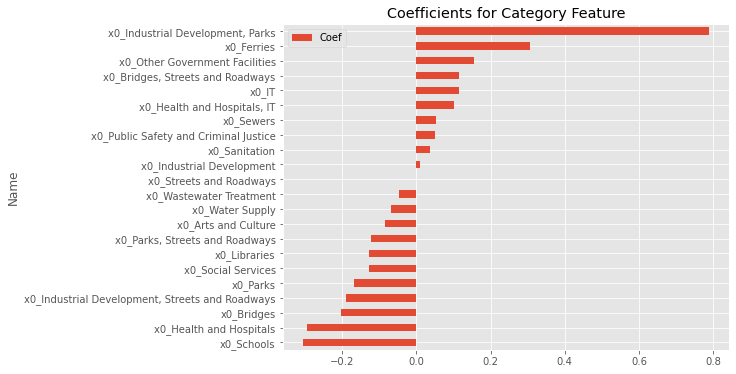

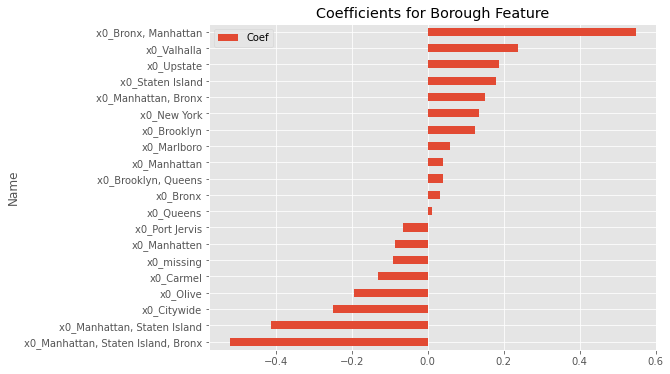

In [266]:
# look at linear coefficients for visualization
category_names = list(features.named_transformers_['Category'].named_steps['onehot'].get_feature_names())
borough_names = list(features.named_transformers_['Borough'].named_steps['onehot'].get_feature_names())
feature_names = category_names+borough_names
feature_values = pd.DataFrame({'Coef':linreg.named_steps['reg'].coef_,'Name':feature_names})

# plot for Category
feature_values[feature_values.Name.isin(category_names)].sort_values('Coef').set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('Coefficients for Category Feature')
plt.show()

# plot for Borough
feature_values[feature_values.Name.isin(borough_names)].sort_values('Coef').set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('Coefficients for Borough Feature')
plt.show()

### 3.2.4.  Approach B -  Using text vectorization TfidfVectorizer 

In [73]:
# Preprocessing
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
    
    
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                   ('onehot', OneHotEncoder(handle_unknown='ignore'))])


project_transformer = Pipeline([('colext', TextSelector('Project Name')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

desc_transformer = Pipeline([('colext', TextSelector('Description')),
                             ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, ngram_range=(1,1),analyzer='word')),
                             ])

features=ColumnTransformer([('Project Name', project_transformer,['Project Name']),
                       ('Description', desc_transformer,['Description']),
                       ('Category', categorical_transformer,['Category']),
                       ('Borough', categorical_transformer,['Borough']),
                       ('Managing Agency', categorical_transformer,['Managing Agency']),
                       ('Client Agency', categorical_transformer,['Client Agency']),
                       ('Current Phase', categorical_transformer,['Current Phase']),
                      ])

In [268]:
reg_xgb2 = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15],
    'reg__learning_rate':[0.001, 0.01, 0.1],
    'reg__lambda':[0.5, 1, 1.5, 2.0],
    'reg__alpha':[0.5, 1, 1.5, 2.0],
}

search2_xgb = GridSearchCV(reg_xgb2, param_grid, n_jobs=4, scoring='r2')
search2_xgb.fit(X_train2, y_train2)
print("Best parameter (CV score=%0.3f):" % search2_xgb.best_score_)
print(search2_xgb.best_params_)

Best parameter (CV score=0.824):
{'reg__alpha': 0.5, 'reg__lambda': 2.0, 'reg__learning_rate': 0.1, 'reg__max_depth': 10, 'reg__n_estimators': 200}


In [74]:
reg2_xgb = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 10, n_estimators=200, reg_alpha= 0.5, reg_lambda= 2.0, learning_rate= 0.1))
                     ])

reg2_xgb.fit(X_train2, y_train2)
pred_train2_xgb = reg2_xgb.predict(X_train2)
pred_test2_xgb = reg2_xgb.predict(X_test2)
print("train r^2:",r2_score(y_train2, pred_train2_xgb))
print("test r^2:",r2_score(y_test2, pred_test2_xgb))

print("train mse:",mean_squared_error(y_train2, pred_train2_xgb))
print("test mse:",mean_squared_error(y_test2, pred_test2_xgb))

/anaconda3/envs/cs109b/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:14:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train r^2: 0.9625094369338317
test r^2: 0.8630648142918785
train mse: 0.004853853192826893
test mse: 0.020613088737999396


In [148]:
reg_rf2 = Pipeline(steps=[('feature', features), 
                      ('reg', RandomForestRegressor())
                     ])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'reg__n_estimators': [50, 100, 200, 300],
    'reg__max_depth': [5, 10, 15, 20],
}

search2_rf = GridSearchCV(reg_rf2, param_grid, n_jobs=4, scoring='r2')
search2_rf.fit(X_train2, y_train2)
print("Best parameter (CV score=%0.3f):" % search2_rf.best_score_)
print(search2_rf.best_params_)

Best parameter (CV score=-0.469):
{'reg__max_depth': 20, 'reg__n_estimators': 100}


In [149]:
# build the model
reg2_rf = Pipeline(steps=[('feature', features), 
                      ('reg', XGBRegressor(max_depth= 20, n_estimatros=100))
                     ])

reg2_rf.fit(X_train2, y_train2)
pred_train2_rf = reg2_rf.predict(X_train2)
pred_test2_rf = reg2_rf.predict(X_test2)
print("train:",r2_score(y_train2, pred_train2_rf))
print("test:",r2_score(y_test2, pred_test2_rf))

train: 0.46450137062174257
test: -1.487435219699369


Similar to what happened with the schedule changes prediciton, it seems like xgboost outperform random forest.
As we did in the schedule prediction task, we can also look at the feature importances of the XGBoost model. Many of the most important features are a text features. The most important categorical feature is the departemnt of environemntal protection and the department of transportation (DEP, DOT). This indicates that predicting budget changes may be impacted both by type of project, as well as the management within each department. The main text words that were important were "section", "renov", and "long." While these are not the most clear to interpret, it does suggest that if the project is a renovation or a new construction may impact the budgetary outcomes.

In [271]:
# get the feature names and feature importances
feature_keys = ['Project Name', 'Description', 'Category', 'Borough', 'Managing Agency', 'Client Agency', 'Current Phase']
feature_names = []
feature_category = []
for k in feature_keys:
    if k in ['Project Name','Description']:
        names = list(features.named_transformers_[k].named_steps['tfidf'].get_feature_names())
    else: 
        names = list(features.named_transformers_[k].named_steps['onehot'].get_feature_names())
    feature_names = feature_names + names
    feature_category = feature_category + [k]*len(names)

xgb_feature_imp = pd.DataFrame({'Category':feature_category,'Name':feature_names,'Importance':reg2_xgb.named_steps['reg'].feature_importances_})
xgb_feature_imp.head()


,Category,Name,Importance
0,Project Name,-,0.001617
1,Project Name,1,0.000217
2,Project Name,10,0.000000
3,Project Name,11,0.000000
4,Project Name,115th,0.000000


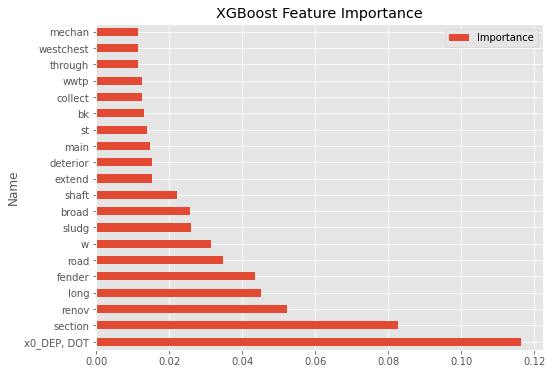

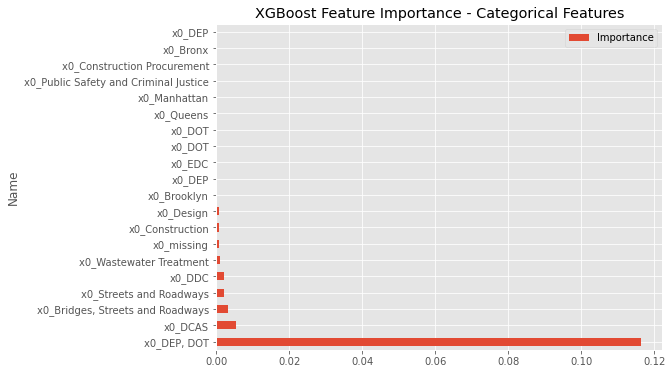

In [272]:
# plot feature importance of all features
xgb_feature_imp.sort_values('Importance',ascending=False).head(20).set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('XGBoost Feature Importance')
plt.show()

# plot feature importance - categorical features
xgb_feature_imp[~xgb_feature_imp.Category.isin(['Project Name','Description'])].sort_values('Importance',ascending=False).head(20).set_index('Name').plot(figsize=(8,6),kind='barh')
plt.title('XGBoost Feature Importance - Categorical Features')
plt.show()

#### Model Evaluation for TfidfVectorizer to Predict Schedule Changes

Best xgboost model using these parameter (highest R2 score from CV): max_depth= 10, n_estimators=200, reg_alpha= 0.5, reg_lambda= 2.0, 

Best Scores:
- $R^2$ from training set = 0.96
- $R^2$ from testing set = 0.86
- train mse: 0.0049
- test mse: 0.0206

### 3.2.5. Approach C - Using LDA to classify the projects into "topics"

Similar to what we did for the schedule changes prediction, we are going to use LDA to classify the projects in "topics". This will be done on column "Project Name" and "Description". We then use the Coherence Score to determine the number of topics for the classification. Given that LDA is unsupervised it may seem odd to repeat the same analysis when the outcome variable is the main point of change. However, due to data availability, there are some projects that do not have data on budgets that did have data on scheduling and were included in the scheduling analysis. As a result, this is a slightly different sample for the budget analysis and thus the LDA needs to be re-run for the new set of data.  

Num Topics = 5  has Coherence Value of 0.5208
Num Topics = 10  has Coherence Value of 0.5119
Num Topics = 15  has Coherence Value of 0.4934
Num Topics = 20  has Coherence Value of 0.4699
Num Topics = 25  has Coherence Value of 0.4891
Num Topics = 30  has Coherence Value of 0.4888
Num Topics = 35  has Coherence Value of 0.4876


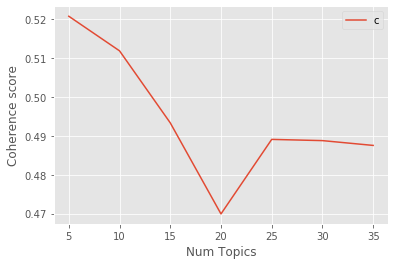

In [39]:
df_budget2 = df_budget.copy()

# Seperate NLP features
corpus = df_budget2['Project Name']
df_budget2 = df_budget2.drop(['Project Name'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

start, limit, step=5,40,5
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
# plt.ylim([0.4, 0.6])
plt.show()

Num Topics = 5  has Coherence Value of 0.5249
Num Topics = 6  has Coherence Value of 0.5238
Num Topics = 7  has Coherence Value of 0.5393
Num Topics = 8  has Coherence Value of 0.5209
Num Topics = 9  has Coherence Value of 0.5077
Num Topics = 10  has Coherence Value of 0.5014


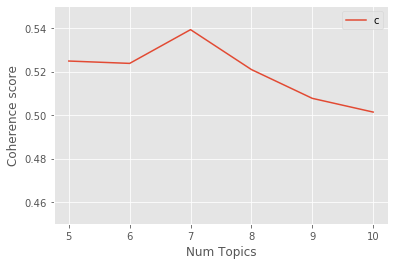

In [40]:
# Repeat the process using the most promising interval : 5-10
start, limit, step=5,11,1
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.ylim([0.45, 0.55])
plt.show()

Using **7 number of topics** gives the highest coherence score

From the word cloud and pyLDAvis, we can see that the there are many more topics in each group as compared to schedule changes analysis. This makes sense, as there are many less groups. Some of the groups seem very cohesive while others are harder to detect a clear pattern. It is clear that topic 3 are sewage and waste treatment projects and topic 7 seem to be water based projects, but the other topics seem to be a mix of construction realted terms. As before, we have included the pyLDAvis for the first topic. The circles are relatively far apart, which suggests the groupings are more distinct. However, the top words for topic 1 seem to suggest a street or bridge project but it is not completely clear what pattern is being picked up here.

In [41]:
# Select the model and print the topics
optimal_model3 = model_list[2]
model_topics = optimal_model3.show_topics(formatted=False)
pprint(optimal_model3.print_topics(num_topics=optimal_model3.num_topics, num_words=10))

# build the df that incorporates the topic classification
df_budget2 = add_topics_to_df(optimal_model3, doc_term_matrix_description, df_budget2, 
                            new_col='topics_projectname', num_topics=optimal_model3.num_topics)
df_budget2 = pd.get_dummies(df_budget2, columns=['topics_projectname'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_budget2.shape))

[(0,
  '0.070*"reconstruction" + 0.070*"street" + 0.039*"roadway" + 0.032*"park" + '
  '0.027*"east" + 0.025*"area" + 0.024*"south" + 0.023*"bridge" + '
  '0.023*"program" + 0.017*"infrastructure"'),
 (1,
  '0.070*"street" + 0.067*"reconstruction" + 0.062*"construction" + '
  '0.062*"phase" + 0.050*"avenue" + 0.041*"bridge" + 0.032*"west" + 0.028*"2" '
  '+ 0.023*"replacement" + 0.021*"creek"'),
 (2,
  '0.059*"water" + 0.045*"avenue" + 0.042*"treatment" + 0.035*"main" + '
  '0.034*"plant" + 0.033*"st" + 0.031*"sewer" + 0.029*"park" + 0.025*"waste" + '
  '0.021*"installation"'),
 (3,
  '0.072*"bridge" + 0.052*"rehabilitation" + 0.043*"island" + '
  '0.042*"replacement" + 0.038*"avenue" + 0.025*"phase" + 0.019*"area" + '
  '0.018*"atlantic" + 0.018*"river" + 0.014*"parkway"'),
 (4,
  '0.078*"construction" + 0.056*"water" + 0.046*"main" + 0.036*"new" + '
  '0.033*"street" + 0.032*"boulevard" + 0.031*"2" + 0.031*"west" + '
  '0.029*"trunk" + 0.020*"project"'),
 (5,
  '0.075*"construction" 

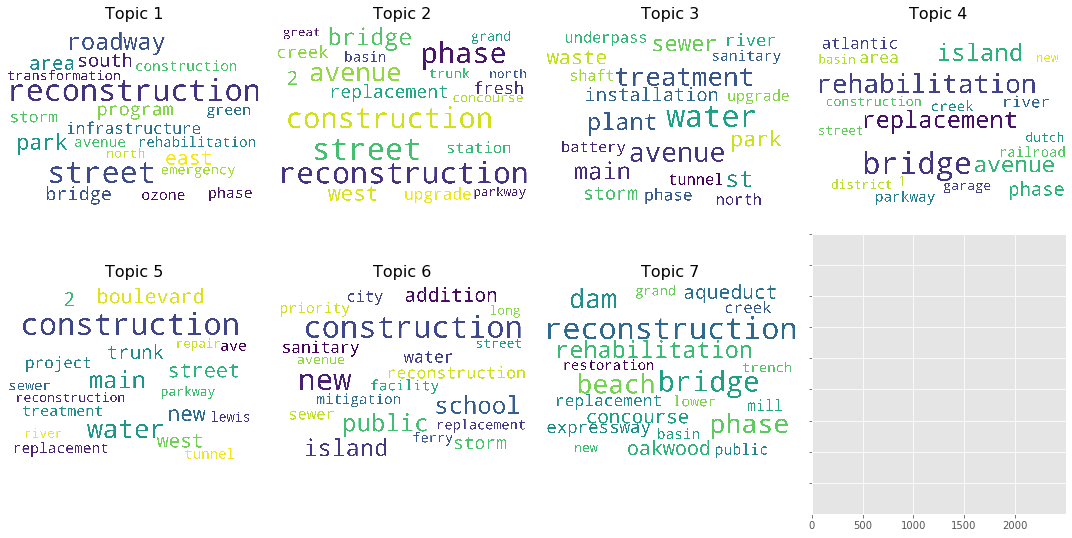

In [42]:
# create wordcloud
cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  #colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# get top 20 words for each topic
topics = optimal_model3.show_topics(num_topics = optimal_model3.num_topics, num_words=20,formatted=False)

# create for 2x4 topics
fig, axes = plt.subplots(2, 4, figsize=(15,8), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    if i < optimal_model3.num_topics:
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [43]:
pyLDAvis.enable_notebook()
# inputs: lda model, corpus, dictionary
vis3 = pyLDAvis.gensim.prepare(optimal_model3, doc_term_matrix_description, dictionary=optimal_model3.id2word)
pyLDAvis.save_html(vis3, 'budget_LDA_projectname.html')
pyLDAvis.display(vis3)

/anaconda3/envs/cs109b/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


![title](LDAvis3.png)

We will now do the same approach for classification for the project description.

Num Topics = 5  has Coherence Value of 0.3583
Num Topics = 10  has Coherence Value of 0.3399
Num Topics = 15  has Coherence Value of 0.3552
Num Topics = 20  has Coherence Value of 0.3449
Num Topics = 25  has Coherence Value of 0.3657
Num Topics = 30  has Coherence Value of 0.4089
Num Topics = 35  has Coherence Value of 0.4104


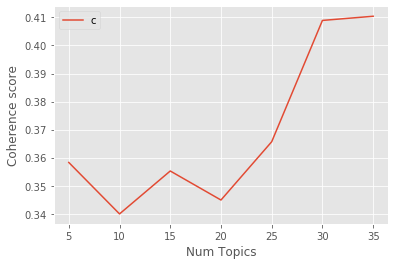

In [44]:
df_budget3 = df_budget2.copy()

corpus = df_budget3['Description']
df_budget3 = df_budget3.drop(['Description'], axis = 1)

corpus_description = corpus.astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

start, limit, step = 5,40,5
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Num Topics = 30  has Coherence Value of 0.3559
Num Topics = 31  has Coherence Value of 0.3799
Num Topics = 32  has Coherence Value of 0.4047
Num Topics = 33  has Coherence Value of 0.381
Num Topics = 34  has Coherence Value of 0.4218
Num Topics = 35  has Coherence Value of 0.371
Num Topics = 36  has Coherence Value of 0.3993
Num Topics = 37  has Coherence Value of 0.3673
Num Topics = 38  has Coherence Value of 0.3945
Num Topics = 39  has Coherence Value of 0.3678


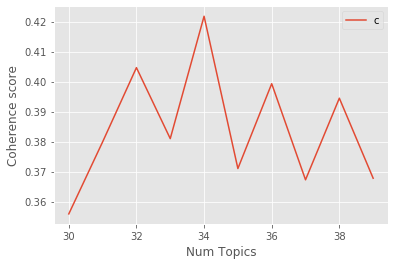

In [45]:
# Repeat the process using the most promising interval : >30
start, limit, step=30,40,1
model_list, coherence_values = compute_coherence_values(processed_corpus_description, doc_term_matrix_description, dictionary_description, 
                                                        limit=limit,start=start,step=step)

x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
# plt.ylim([0.45, 0.55])
plt.show()

It seems like **34 number of topics** is the best one for project description.

In [46]:
# Select the model and print the topics
optimal_model4 = model_list[4]
model_topics = optimal_model4.show_topics(formatted=False)
pprint(optimal_model4.print_topics(num_topics=optimal_model4.num_topics, num_words=10))

df_budget3 = add_topics_to_df(optimal_model4, doc_term_matrix_description, df_budget3, 
                            new_col='topics_description', num_topics=optimal_model4.num_topics)

df_budget3 = pd.get_dummies(df_budget3, columns=['topics_description'], drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df_budget3.shape))


[(0,
  '0.052*"street" + 0.034*"plant" + 0.031*"project" + 0.030*"collection" + '
  '0.024*"final" + 0.024*"settling" + 0.024*"tank" + 0.022*"treatment" + '
  '0.019*"concrete" + 0.018*"w"'),
 (1,
  '0.041*"project" + 0.034*"water" + 0.027*"street" + 0.025*"storm" + '
  '0.021*"phase" + 0.020*"reconstruction" + 0.019*"construction" + '
  '0.018*"main" + 0.018*"sanitary" + 0.017*"park"'),
 (2,
  '0.036*"main" + 0.034*"replacement" + 0.029*"six" + 0.024*"storm" + '
  '0.023*"beach" + 0.023*"installation" + 0.020*"reconstruction" + '
  '0.020*"sanitary" + 0.018*"water" + 0.017*"center"'),
 (3,
  '0.042*"order" + 0.032*"construction" + 0.029*"design" + '
  '0.026*"infrastructure" + 0.025*"sewer" + 0.023*"combined" + 0.022*"comply" '
  '+ 0.022*"way" + 0.022*"manage" + 0.022*"green"'),
 (4,
  '0.089*"bridge" + 0.038*"new" + 0.035*"pedestrian" + 0.029*"belt" + '
  '0.028*"parkway" + 0.027*"carrying" + 0.025*"steel" + 0.024*"replace" + '
  '0.023*"concrete" + 0.023*"eastbound"'),
 (5,
  '0.04

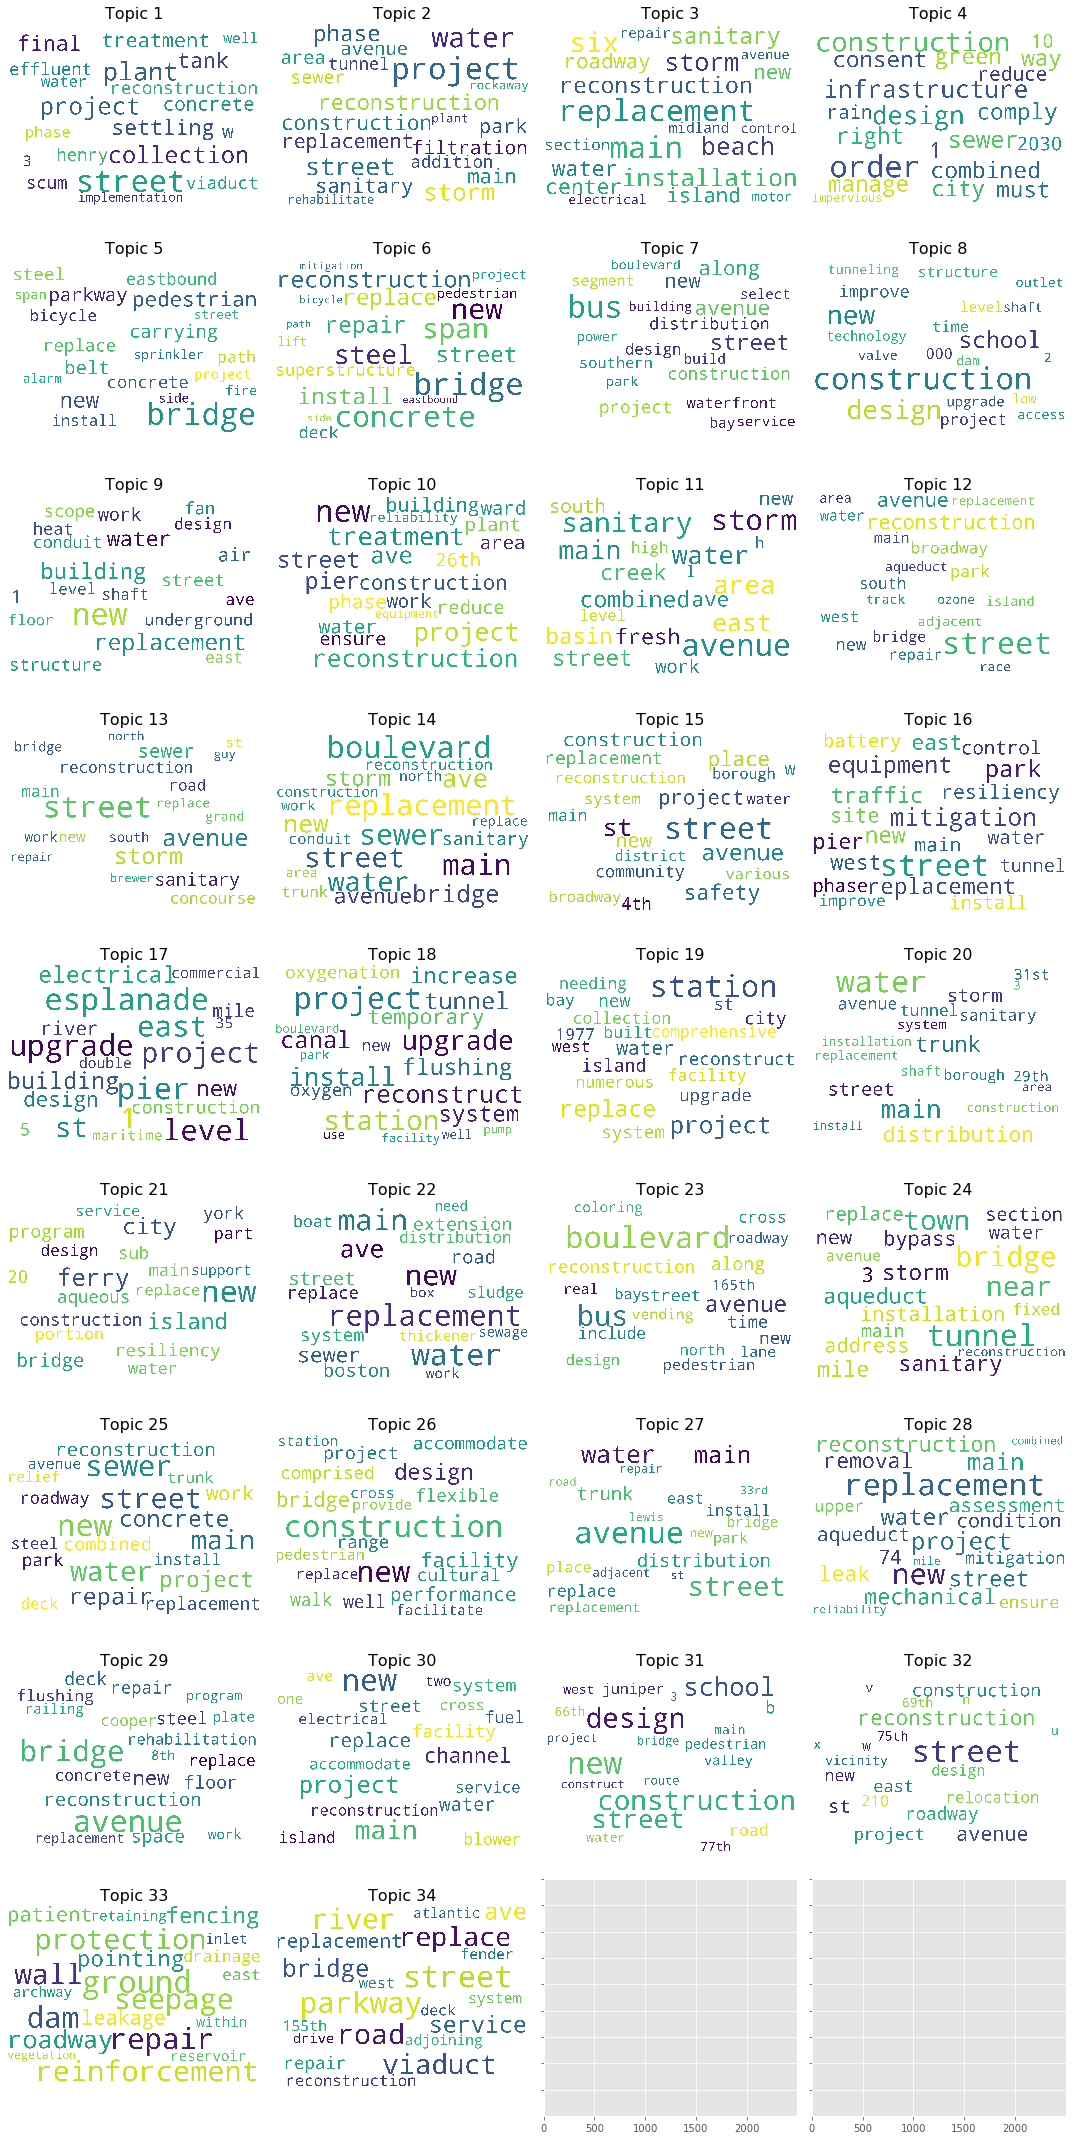

In [48]:
# create wordcloud
cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  #colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# get top 20 words for each topic
topics = optimal_model4.show_topics(num_topics = optimal_model4.num_topics, num_words=20,formatted=False)

# create for 9x4 topics
fig, axes = plt.subplots(9, 4, figsize=(15,30), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    if i < optimal_model4.num_topics:
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [49]:
pyLDAvis.enable_notebook()
# inputs: lda model, corpus, dictionary
vis4 = pyLDAvis.gensim.prepare(optimal_model4, doc_term_matrix_description, dictionary=optimal_model4.id2word)
pyLDAvis.save_html(vis4, 'budget_LDA_projectdescription.html')
pyLDAvis.display(vis4)

/anaconda3/envs/cs109b/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


![title](LDAvis4.png)

There are many more groups in the project description. Once again, there are some clearly well defined projects in the topics. For example, topic 33 seems to be focused on preventing spill-off or drainage (which seems niche but is interesting the algorithm was able to identify this pattern), topic 11 is about bodies of water, etc. However, there are many groupings that do not seem to be alligned on a certain type of work or project. In the pyLDAvis above, we can see there is lots of overlap in the circles, suggesting the clusters are not as unique. In the most relevant terms, there seem to be a lot of water and storm based words but the top word is "avenue", so it's slightly unclear how these words all relate. 

Now, we are ready to go to a supervised regression model to predict the budget changes.

In [54]:
# Dummy encoding
categorical_feats = ['Category','Borough', 'Managing Agency', 'Client Agency', 'Current Phase']
df_budget3 = pd.get_dummies(df_budget3, columns=categorical_feats, drop_first=False)


# Create response and target variable
X_train, X_test, y_train, y_test = train_test_split(df_budget3.drop('Total_Budget_Changes_percent', axis=1), 
                                                    df_budget3['Total_Budget_Changes_percent'], test_size=0.2)

display(X_train)

,topics_projectname_0,topics_projectname_1,topics_projectname_2,topics_projectname_3,topics_projectname_4,topics_projectname_5,topics_projectname_6,topics_description_0,topics_description_1,topics_description_2,...,Client Agency_NYPD,Client Agency_ORR,Client Agency_QL,Client Agency_WWC,Current Phase_Close-Out,Current Phase_Construction,Current Phase_Construction Procurement,Current Phase_Design,Current Phase_IT,Current Phase_Scoping/Planning
1353,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
962,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1702,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1754,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
254,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
55,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1534,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1467,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# trying out xgboost model for regression
lda_reg_xgb2 = XGBRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15],
    'lambda':[0.5, 1, 1.5, 2],
    'alpha':[0.5, 1, 1.5, 2],
}

search_lda_xgb = GridSearchCV(lda_reg_xgb2, param_grid, n_jobs=4, scoring='r2')
search_lda_xgb.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_xgb.best_score_)
print(search_lda_xgb.best_params_)

/anaconda3/envs/cs109b/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameter (CV score=0.794):
{'alpha': 0.5, 'lambda': 0.5, 'max_depth': 15, 'n_estimators': 150}


In [58]:
lda_reg_xgb2 = XGBRegressor(max_depth=15, n_estimators=150, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5)
lda_reg_xgb2.fit(X_train, y_train)
pred_train_xgb = lda_reg_xgb2.predict(X_train)
pred_test_xgb = lda_reg_xgb2.predict(X_test)
print("train:",r2_score(y_train, pred_train_xgb))
print("test:",r2_score(y_test, pred_test_xgb))

/anaconda3/envs/cs109b/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train: 0.9026904700351376
test: 0.8565863475162713


In [70]:
print("train mse:",mean_squared_error(y_train, pred_train_xgb))
print("test mse:",mean_squared_error(y_test, pred_test_xgb))

train mse: 0.013023698876469628
test mse: 0.01925368600839091


In [59]:
# trying out random forest model for regression
lda_reg_rf2 = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20],
}

search_lda_rf = GridSearchCV(lda_reg_rf2, param_grid, n_jobs=4, scoring='r2')
search_lda_rf.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_lda_rf.best_score_)
print(search_lda_rf.best_params_)

Best parameter (CV score=0.734):
{'max_depth': 20, 'n_estimators': 250}


In [60]:
lda_reg_rf2 = RandomForestRegressor(max_depth=20, n_estimators=250)
lda_reg_rf2.fit(X_train, y_train)
pred_train_rf = lda_reg_rf2.predict(X_train)
pred_test_rf = lda_reg_rf2.predict(X_test)
print("train:",r2_score(y_train, pred_train_rf))
print("test:",r2_score(y_test, pred_test_rf))

train: 0.8596152969477695
test: 0.8013563181572523


#### Model Evaluation for LDA to Predict Budget Changes

Best xgboost model using these parameter (highest R2 score from CV): max_depth= 15, n_estimatros=150, reg_alpha= 0.5, reg_lambda= 0.5, learning_rate= 0.5

Best Scores:
- $R^2$ from training set = 0.90
- $R^2$ from testing set = 0.86
- MSE from training set = 0.0130
- MSE from testing set = 0.0193



In [96]:
#Display feature importance
def feature_importance(model, trainData, display_n_rows):
    """Display feature importance & weighting for tree based model"""
    fi = model.feature_importances_*100
    feat_imp = pd.DataFrame(list(zip(fi,trainData.columns.values)))
    feat_imp = feat_imp.sort_values(by=0, axis=0, ascending=False)
    feat_imp.columns = ['importance %', 'feature']
    print(feat_imp[:display_n_rows])#Display feature importance

#Display features & weighting
feature_importance(lda_reg_xgb2, X_train, 20)

     importance %                                 feature
102     15.532662                  Client Agency_DEP, DOT
119     11.734759            Client Agency_Mayor's Office
57       7.789344                        Category_Schools
10       4.837874                    topics_description_3
121      4.755827                       Client Agency_ORR
91       4.040529                    Managing Agency_FDNY
109      3.315383                Client Agency_DOHMH, HHC
49       2.826810  Category_Industrial Development, Parks
64       2.739840                Borough_Bronx, Manhattan
69       2.482245                       Borough_Manhattan
56       2.227495                     Category_Sanitation
38       1.870091                   topics_description_31
43       1.833988  Category_Bridges, Streets and Roadways
34       1.700190                   topics_description_27
65       1.485438                        Borough_Brooklyn
83       1.471461                     Managing Agency_DDC
80       1.396

**Findings:**

From the list of important features above, it seems like `Client Agency` of "DEP, DOT", "Mayor's Office", "ORR", "DOHMH, HHC" as well as `Managing Agency` of "FDNY" and "DDC" plays the most significant role in determining the schedule changes. In addition, `Borough` of Bronx, Manhattan, Brooklyn and Upstate, as well as those in `Category` of "Schools", "Industrial Development, Parks", "Sanitation", "Bridges, Streets and Roadways" and "Water Supply" are also important. The project `Description` topic 3, 31, 27, 22 plays quite a significant role in determining the schedule changes. To reiterate from the above visualizations, the top 10 words associated with these topics are:
   
- project description 
    - topic 3: *order, construction, design, infrastructure, sewer, combined, comply, way, manage, green*
    - topic 22: *boulevard, bus, avenue, along, reconstruction, new, time, street, include, cross*
    - topic 27: *replacement, new, project, main, water, street, mechanical, reconstruction, removal, leak*
    - topic 31: *street, reconstruction, avenue, st, construction, roadway, east, project, new, 210*

### 3.2.6. Approach D: Using neural network with embedding layer

Similar as before, we want to build a neural network using embedding layer to represent the words as vectors. Then, using tsne, we are going to visualize the latent space.

In [60]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.text import one_hot,text_to_word_sequence

from tensorflow.keras import  Sequential, layers,optimizers
from tensorflow.keras.models import model_from_json,Model
from tensorflow.keras.layers import Input, Embedding, Dense, TimeDistributed, \
                          Dropout, BatchNormalization,Flatten

from sklearn.manifold import TSNE

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/11372791/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# text cleaning
## tokenizer, stemmer, remove special characters, remove stopwords, and remove words with numbers in them
def TokenizerNoNumerical(str_input):
    words = re.sub(r"[^A-Za-z0-9]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = [porter_stemmer.stem(word) for word in words if not any(map(str.isdigit, word)) and word not in stop_words]
    return words


target_variable = 'Total_Budget_Changes_percent'
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_budget.drop(target_variable, axis=1), 
                                                    df_budget[target_variable], test_size=0.2)

# text preprocessing
X_train_copy = X_train2.copy()
X_test_copy = X_test2.copy()
X_train_copy['Total Text'] = [p+' '+d for p,d in zip(X_train_copy['Project Name'],X_train_copy['Description'])]
X_test_copy['Total Text'] = [p+' '+d for p,d in zip(X_test_copy['Project Name'],X_test_copy['Description'])]
X_train_copy['Total Text'] = X_train_copy['Total Text'].map(TokenizerNoNumerical)
X_test_copy['Total Text'] = X_test_copy['Total Text'].map(TokenizerNoNumerical)

# get corpus word dictionary
words = sorted(set([w for s in X_train_copy['Total Text'] for w in s]+[w for s in X_test_copy['Total Text'] for w in s]))
word2idx = {wd:i for i,wd in enumerate(words)}
idx2word = {i:wd for wd,i in word2idx.items()}
num_words = len(words)

# maximum text length
max_length = max(X_train_copy['Total Text'].map(len).max(),X_test_copy['Total Text'].map(len).max())    

# text features 
## list of lists
X_train_text = [[word2idx[w] for w in s] for s in X_train_copy['Total Text']]
X_test_text = [[word2idx[w] for w in s] for s in X_test_copy['Total Text']]
## padded array
X_train_text = pad_sequences(X_train_text, maxlen=max_length, padding='post',truncating='post')
X_test_text = pad_sequences(X_test_text, maxlen=max_length, padding='post',truncating='post')

# function to create one-hot encode categorical features
def prepare_categorical_features(X_train,X_test):
    X_train = X_train.fillna('missing')
    X_test = X_test.fillna('missing')
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

# create categorical features
cat_features = ['Category','Borough','Managing Agency','Client Agency','Current Phase']
X_train_enc,X_test_enc = prepare_categorical_features(X_train_copy[cat_features],X_test_copy[cat_features])
cat_dim = X_train_enc.shape[1]
X_train_enc=X_train_enc.toarray()
X_test_enc=X_test_enc.toarray()

In [64]:
# Plot history
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
 
tf.keras.backend.clear_session()

 # model and training parameters 
n_units = 50
dim_embed = 30
batch_size = 32
epochs = 20
validation_split = 0.1
verbose = 1

# create model
text_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=num_words, output_dim=dim_embed, input_length=max_length)(text_input)
embedding_layer = Flatten()(embedding_layer)

cat_input = Input(shape=cat_dim)
x = layers.concatenate([embedding_layer, cat_input])
x = Dense(n_units,activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1)(x)
model = Model([text_input,cat_input],output,name='EmbeddingModel')

# compile model
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mse', metrics=['accuracy'])

# look at model architecture
print(model.summary())

# Train model
history = model.fit([X_train_text,X_train_enc], y_train2, shuffle=True,batch_size=batch_size, epochs=epochs, 
                    validation_split=validation_split, verbose=verbose)


Model: "EmbeddingModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 227, 30)      44580       input_1[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 6810)         0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 91)]         0                                            
_____________________________________________________________________________________

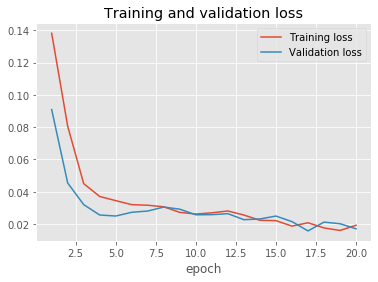

In [65]:
# plot of training/validation loss to check training convergence
plot_training_history(history)

In [66]:
# create prediction on both the training and test set
yhat_train = model.predict([X_train_text,X_train_enc])
yhat_test = model.predict([X_test_text,X_test_enc])

# r^2 and mse
print("train:",r2_score(y_train2, yhat_train))
print("test:",r2_score(y_test2, yhat_test))

print("train mse:",mean_squared_error(y_train2, yhat_train))
print("test mse:",mean_squared_error(y_test2, yhat_test))

train: 0.9231493116998162
test: 0.8357575298221263
train mse: 0.010549176164600627
test mse: 0.019809739362382665


We are going to use the words "section" (high in Approach B feature importance) and "construction" (high in Approach C feature importance). As we can see from our TSNE, the words closest to roadway and develop were quite far from in the graph below.

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

# embedding weights from model
embedding_weights = model.layers[1].get_weights()[0]

def find_most_similar(word,embedding,topN=10,return_type='words'):
    '''
    function to calculate the top N closest word vectors to a given word
    inputs:
    - word: target word
    - embedding: matrix of embedding weights
    - topN: number of closest words to return
    - return_type: format to return (words,index)
    '''
    word_index = word2idx[word]
    # calculate similarity matrix. return in order from most to least similar
    sim_matrix = cosine_similarity(embedding,embedding[word_index,:].reshape(1,-1)).ravel()
    order = np.argsort(sim_matrix,axis=0)[::-1]
    if return_type == 'words':
        return [(idx2word[idx],sim_matrix[idx]) for idx in order[:topN]]
    else:
        return order[:topN]

# example of close words to develop
find_most_similar('order',embedding_weights)
from sklearn.metrics.pairwise import cosine_similarity

# embedding weights from model
embedding_weights = model.layers[1].get_weights()[0]

def find_most_similar(word,embedding,topN=10,return_type='words'):
    '''
    function to calculate the top N closest word vectors to a given word
    inputs:
    - word: target word
    - embedding: matrix of embedding weights
    - topN: number of closest words to return
    - return_type: format to return (words,index)
    '''
    word_index = word2idx[word]
    # calculate similarity matrix. return in order from most to least similar
    sim_matrix = cosine_similarity(embedding,embedding[word_index,:].reshape(1,-1)).ravel()
    order = np.argsort(sim_matrix,axis=0)[::-1]
    if return_type == 'words':
        return [(idx2word[idx],sim_matrix[idx]) for idx in order[:topN]]
    else:
        return order[:topN]

# example of close words to develop
find_most_similar('construct',embedding_weights)

[('construct', 1.0000001),
 ('roosevelt', 0.63544965),
 ('bridg', 0.61892575),
 ('regrad', 0.5963844),
 ('crosstown', 0.59234387),
 ('murray', 0.59218127),
 ('aqueou', 0.5874716),
 ('hs', 0.5827145),
 ('initi', 0.5632898),
 ('stabil', 0.56144834)]

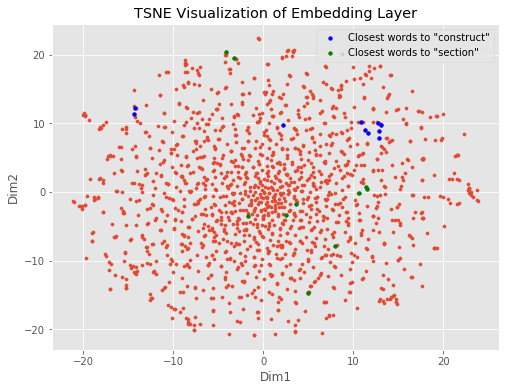

In [78]:
tsne = TSNE(n_components=2,random_state=50)
tsne_latent = tsne.fit_transform(embedding_weights)

# predict
roadway = find_most_similar('construct',embedding_weights,return_type='index')
develop = find_most_similar('section',embedding_weights,return_type='index')


plt.figure(figsize=(8,6))
plt.scatter(tsne_latent[:,0],tsne_latent[:,1],s=10)
plt.scatter(tsne_latent[roadway,0],tsne_latent[roadway,1],s=14,c='blue',label='Closest words to "construct"')
plt.scatter(tsne_latent[develop,0],tsne_latent[develop,1],s=14,c='green',label='Closest words to "section"')
plt.title('TSNE Visualization of Embedding Layer')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.legend()
plt.show()

## 4. Result and Discussion 


### 4.1. The results from each approach for predicting percentage **schedule** changes:

Approach      | Train $r^2$   | Test $r^2$ | Train MSE   | Test MSE
:------------ | :-----------: | :--------: |  :--------: | :--------:
A. Linear Regression (base)  | 0.22  | 0.19  | 0.0752  | 0.0635
B. XGBoost TfIdf  |0.94  | 0.86  | 0.0061  | 0.0106 
C. XGBoost LDA  | 0.91  | 0.84  | 0.0087  | 0.0146  
D. NN Embedding  | 0.89  | 0.80  | 0.0110  | 0.0159  

Obeservation:
- Linear Regression (base) seems to suggest that these factors below tend to lead to higher schedule changes (late):
    - category in *Wastewater treatment, Streets and Roadways*, and *Water Supply*
    - Borough in *Citywide, Port Jarvis, Valhalla, Manhattan, Brooklyn*
    
    While these factors below tend to to lead to negative schedule changes (early):
    - category in *Schools and Industrial Development, Parks*
    - Borough in *combined project between Manhattan, Staten Island, and the Bronx*

- XGBoost (with TfIdf) seems to suggest that projects with *DEP,DEC, or DOT* agency, in *Manhattan* and *Citywide* Borough, and with category in *Wastewater Treatment* play a significant role in leading to shcedule changes, either early or late. These seems to be relatively consistent with what the linear regression suggests above. Additionally, those project names/description with words such as *belgian*, *on*, *develop*, *210* and *boulevard*.
- XGBoost (with LDA) seems to suggest that `Client Agency` of "DSBS", "DEP, EDC", "DEP", "DEP, DOT", "DSNY", as well as `Managing Agency` of "DOC" and "EDC" plays the most significant role in determining the schedule changes. In addition, `Borough` of Manhattan and Citywide, `Current Phase` in Design, as well as those in `Category` of "Schools", "Streets ans Roadways" and "Arts and Culture" are also important. `Project Name` topic 31, 6, 27, and 23 plays quite a significant role in determining the schedule changes, as well as the `Description` topic 22, 10, and 23. To reiterate from the above visualizations, the top 10 words associated with these topics are:
    - project name
        - topic 6: *phase, street, concourse, reconstruction, grand, 4, 1, great, safety, avenue*
        - topic 23: *phase, west, street, trunk, 2, main, water, 20th, triangle, area*
        - topic 27: *construction, park, station, noth, street, green, bridge, infrastructure, railroad, pedestrian*
        - topic 31: *roadway, reconstruction, area, parkway, hill, vinegar, 82nd, 72nd, replacement, henry*

    - project description 
        - topic 10: *power, distribution, boulevard, bus, ave, bay, new, along, cross, reconstruction*
        - topic 22: *distribution, water, main, new, trunk, installation, electrical, restoration, tunnel, avenue*
        - topic 23: *water, main, street, trunk, avenue, 29th, 31st, order, place, distribution*
- NN with Embedding: we try to visualize the latent space on how the word embeddings are mapped (what similar words are mapped close to each other). The visualization we have above is a two dimensional TSNE representation of the embedding layer weights. We plot similar words to "develop" and "roadway" (important features from the XGBoost regression model) and the similar words cluster approximately near each other. Similar words used in this regression task will have similar word vectors and can be found using cosine similarity. (For example, in the above we plot similar word stems to "develop", such as "archway", "recreat", and "deliv"). The similarity of these words will be a bit less intuitive than a pretrained word2vec model (using Wikipedia or another large corpus) because pretrained word embedding models are trained on much larger corpuses and have a larger number of words. Additionally, the embedding layer here is connected to a regression task whereas the word2vec directly identifies words being used in similar contexts. It is possible to use a pretained embedding model to initialize the weights of our embedding layer, but we chose not to for simplicity.


### 4.2. The results from each approach for predicting percentage **budget** changes:

Approach      | Train $r^2$   | Test $r^2$ | Train MSE   | Test MSE
:------------ | :-----------: | :--------: |  :--------: | :--------:
A. Linear Regression (base)  | 0.17  | 0.15  | 0.1150  | 0.0997  
B. XGBoost TfIdf  | 0.96  | 0.86  | 0.0049  | 0.0206  
C. XGBoost LDA  | 0.90  | 0.86  | 0.0130  | 0.0193  
D. NN Embedding  | 0.92  | 0.84  | 0.0105  | 0.0198  

Obeservation:
- Linear Regression (base) seems to suggest that these factors below tend to lead to higher schedule changes (late):
    - category in *Industrial Development, Parks, Ferries*
    - Borough in *Combined Bronx, Manhattan; Valhalla; Upstate*
    While these factors below tend to to lead to negative schedule changes (early):
    - category in *Schools, Health and Hospitals, Bridges*
    - Borough in *combined project between Manhattan, Staten Island, and the Bronx*
- XGBoost (with TfIdf) seems to suggest that projects with *DEP, DOT* agency and with category in *Bridges, Streets and Roadways* play a significant role in leading to shcedule changes, either early or late. These seems to be relatively consistent with what the linear regression suggests above. Additionally, those project names/description with words such as *section*, *renov*, *fender*, *long* and *road*.
- XGBoost (with LDA) seems to suggest that `Client Agency` of "DEP, DOT", "Mayor's Office", "ORR", "DOHMH, HHC" as well as `Managing Agency` of "FDNY" and "DDC" plays the most significant role in determining the schedule changes. In addition, `Borough` of Bronx, Manhattan, Brooklyn and Upstate, as well as those in `Category` of "Schools", "Industrial Development, Parks", "Sanitation", "Bridges, Streets and Roadways" and "Water Supply" are also important. The project `Description` topic 3, 31, 27, 22 plays quite a significant role in determining the schedule changes. To reiterate from the above visualizations, the top 10 words associated with these topics are:
    - project description 
        - topic 3: *order, construction, design, infrastructure, sewer, combined, comply, way, manage, green*
        - topic 22: *boulevard, bus, avenue, along, reconstruction, new, time, street, include, cross*
        - topic 27: *replacement, new, project, main, water, street, mechanical, reconstruction, removal, leak*
        - topic 31: *street, reconstruction, avenue, st, construction, roadway, east, project, new, 210*
- NN with embedding: we did not specifically build a visualization for the NN as we expected similar situation as described above. The similarity of the words in this dataset modelled by the embedding will be a bit less intuitive than a pretrained word2vec model (using Wikipedia or another large corpus) because pretrained word embedding models are trained on much larger corpuses and have a larger number of words. Additionally, the embedding layer here is connected to a regression task whereas the word2vec directly identifies words being used in similar contexts. It is possible to use a pretained embedding model to initialize the weights of our embedding layer, but we chose not to for simplicity.

### 4.3 Final Thoughts

In class, Professor Grushka-Cockayne emphasized a triangle in explaining elements of budget success: budget, time, and scope. She emphasized that projects tend to make trade offs within the traingle. While we do not have data on scope, we can analyze the differences in budget and schedule. For example, projects may go over budget in order to finish on time or may stay under budget but know they are going to be late finishing their task. Using Approach A, while it had underwhelming results, did show that park related projects are correlated with negative percent over schedule (i.e. finishing early) but were some of the most over budget projects. This is evidence of the real world trade-offs some projects may make. We are less able to assess this using our other models, but while the models are less interpretable they are much more accurate. Overall, adding in NLP and text analysis dramatically improved the performance of the models, increasing both the r-squared and lowering the MSE. 

In evaluating our later models, LDA and TF-IDF methods seemed better suited for text analysis than Neural Networks for this application. Although using cohesion graphs with LDA did not point to a clear optimal number of groups for the models, there were some topic groups that seemed clearly defined and intuitively represented a certain "type" of project. 

Finally, we can evaluate the changes between budget and schedule analysis. The word groups and general importance of words were more prevalent in the feature importance in the percent over schedule analysis than in the percent over budget analysis. This also suggests that there may be different factors in what makes a project over budget vs. over time. In percent over budget, the important factors were consistently the client agency involved with the projects. While in some instances, the agency and category of project are highly correlated, departments such as the small business services and those hosted within the mayor’s office, span across project categories and were still important variables. This suggests that while certain categories of projects may be associated with predicting budget or schedule changes, the demands and interactions with the client agency also likely matter in predicting project success. 

## References

Baker, B. N., Murphy, D. C., & Fisher, D. (1988). Factors affecting project success. In D. I. Cleland & W. R. King (Eds.), Project management handbook (2nd ed.), pp. 902-919. New York: Van Nostrand Reinhold.

Cleland, D. I. & Ireland, L. R. (2007). Project management: Strategic design and implementation (5th ed.). New York: McGraw-Hill.

Cooke-Davies, T. (2002). The “real” success factors on projects. International Journal of Project Management, 20(3), 185-190.

Cooke-Davies, T. (2004). Project success. In P. W. G. Morris & J. K. Pinto (Eds.). The Wiley guide to managing projects, pp. 99-122. Hoboken, NJ: John Wiley & Sons.

Kloppenborg, T. J. & Opfer W. A. (2002). The current state of project management research: Trends, interpretations, and prediction. Project Management Journal, 33(2), 5-18.

Koskela, L. & Howell, G. (2002). The underlying theory of project management is obsolete. Proceedings of the PMI Research Conference, 293-302.

Morris, P. W. G. (1994). The management of projects. London: Thomas Telford.

Morris, P. W. G. (2002). Science, objective knowledge, and the theory of project management. Proceedings of the Institution of Civil Engineers – Civil Engineering, 150(2), 82-90.

Pinto, J. K. (2004). The elements of project success. In D. I. Cleland (Ed.), Field guide to project management (2nd ed.), pp. 14-27. Hokoben, NJ: John Wiley & Sons.

Pinto, J. K. & Covin, J. C. (1989). Critical factors in project implementation: A comparison of construction and R&D projects. Technovation, 9(1), 49-62.

Sauer, C. & Reich, B. H. (2007). What do we want from a theory of project management? A response to Rodney Turner. International Journal of Project Management, 25(1), 1-2.

- https://medium.com/@chrisfotache/text-classification-in-python-pipelines-nlp-nltk-tf-idf-xgboost-and-more-b83451a327e0
- https://towardsdatascience.com/improving-airbnb-yield-prediction-with-text-mining-9472c0181731
